# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Polazzi, Riccardo (361352);
2. Vandi, Lisa (360247).

Now, fill the python list below with the Student IDs of the team

In [46]:
StudentIDs = [361352, 360247]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [47]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Branded clothing
Entertainment spending
Spending on looks
Spending on healthy eating
Smoking
Healthy eating
Psychology
Mathematics
Physics
PC
Biology
Chemistry
Reading
Law
Art exhibitions
Dancing
Musical instruments
Writing
Active sport
Gardening
Celebrities
Theatre
Fun with friends
Pets
Movies
Thriller
Comedy
Sci-fi
War
Fantasy/Fairy tales
Documentary
Action
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Pop
Rock
Metal or Hardrock
Reggae, Ska
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Daily events
Workaholism
Thinking ahead
Final judgement
Loss of interest
Friends versus money
Funniness
Criminal damage
Decision making
Elections
Judgment calls
Eating to survive
Giving
Loneliness
Cheating in school
Health
God
Dreams
Charity
Number of friends
Punctuality
Lying
Waiting
Appearence and gestures
Socializing
Achievements
Children
Getting angry
Public speaking
Unpopularity
Life struggles


Finances  Branded clothing  Entertainment spending  Spending on looks  \
235         2                 4                       4                  5   
42          3                 3                       3                  1   
515         4                 2                       4                  4   
597         4                 4                       5                  5   
375         1                 5                       5                  5   
..        ...               ...                     ...                ...   
522         3                 5                       4                  3   
273         4                 5                       5                  5   
90          5                 1                       4                  4   
197         4                 1                       3                  3   
626         4                 3                       3                  4   

     Spending on healthy eating         Smoking  Healthy eating  Psychology  \
235                           4    never smoked               3           2   
42                            1   tried smoking               3           3   
515                           3  current smoker               3           3   
597                           5   tried smoking               5           4   
375                           5  current smoker               1           5   
..                          ...             ...             ...         ...   
522                           1   former smoker               1           2   
273                           4   tried smoking               3           4   
90                            3   tried smoking               3           4   
197                           4  current smoker               3           5   
626                           3   tried smoking               3           5   

     Mathematics  Physics  ...  Age  Height  Weight  Number of siblings  \
235            2        1  ...   17     160      60                   1   
42             1        1  ...   18     164      51                   4   
515            3        3  ...   25     167      49                   1   
597            1        1  ...   18     170      54                   1   
375            3        2  ...   17     175      60                   2   
..           ...      ...  ...  ...     ...     ...                 ...   
522            2        3  ...   16     170      54                   2   
273            2        2  ...   25     167      64                   2   
90             4        2  ...   16     161      54                   1   
197            1        1  ...   22     170      60                   0   
626            1        1  ...   19     163      56                   1   

     Gender   Hand                Education  Only child  Home Town Type  \
235  female  right           primary school          no            city   
42   female  right         secondary school          no            city   
515  female  right  college/bachelor degree         yes            city   
597  female  right         secondary school          no            city   
375    male  right         secondary school          no         village   
..      ...    ...                      ...         ...             ...   
522  female  right  college/bachelor degree          no            city   
273  female  right           masters degree          no            city   
90   female  right         secondary school          no         village   
197  female  right         secondary school         yes            city   
626  female  right         secondary school          no            city   

          Home Type  
235  block of flats  
42   block of flats  
515  house/bungalow  
597  block of flats  
375  house/bungalow  
..              ...  
522  house/bungalow  
273  block of flats  
90   house/bungalow  
197  house/bungalow  
626  house/bungalow  

[506 rows x 103 columns]


*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


Finances  Branded clothing  Entertainment spending  Spending on looks  \
235         2                 4                       4                  5   
42          3                 3                       3                  1   
515         4                 2                       4                  4   
597         4                 4                       5                  5   
375         1                 5                       5                  5   
..        ...               ...                     ...                ...   
522         3                 5                       4                  3   
273         4                 5                       5                  5   
90          5                 1                       4                  4   
197         4                 1                       3                  3   
626         4                 3                       3                  4   

     Spending on healthy eating         Smoking  Healthy eating  Psychology  \
235                           4    never smoked               3           2   
42                            1   tried smoking               3           3   
515                           3  current smoker               3           3   
597                           5   tried smoking               5           4   
375                           5  current smoker               1           5   
..                          ...             ...             ...         ...   
522                           1   former smoker               1           2   
273                           4   tried smoking               3           4   
90                            3   tried smoking               3           4   
197                           4  current smoker               3           5   
626                           3   tried smoking               3           5   

     Mathematics  Physics  ...  Questionnaires or polls  \
235            2        1  ...                        3   
42             1        1  ...                        4   
515            3        3  ...                        3   
597            1        1  ...                        4   
375            3        2  ...                        5   
..           ...      ...  ...                      ...   
522            2        3  ...                        1   
273            2        2  ...                        3   
90             4        2  ...                        5   
197            1        1  ...                        3   
626            1        1  ...                        5   

              Internet usage  Flying  Darkness  Heights  Spiders  Snakes  \
235          few hours a day       3         2        2        2       3   
42   less than an hour a day       3         1        1        5       1   
515          few hours a day       4         3        4        3       3   
597          few hours a day       1         3        4        4       1   
375          few hours a day       1         3        1        1       3   
..                       ...     ...       ...      ...      ...     ...   
522  less than an hour a day       1         3        4        5       4   
273          few hours a day       1         2        2        1       2   
90           few hours a day       4         1        2        2       4   
197          few hours a day       1         5        5        4       4   
626          few hours a day       1         5        2        1       1   

     Ageing  Dangerous dogs  Fear of public speaking  
235       4               4                        3  
42        1               3                        5  
515       3               3                        3  
597       2               1                        3  
375       1               1                        1  
..      ...             ...                      ...  
522       2               1                        2  
273       3               2                        3  
90


*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


Age  Height  Weight  Number of siblings  Gender   Hand  \
235   17     160      60                   1  female  right   
42    18     164      51                   4  female  right   
515   25     167      49                   1  female  right   
597   18     170      54                   1  female  right   
375   17     175      60                   2    male  right   
..   ...     ...     ...                 ...     ...    ...   
522   16     170      54                   2  female  right   
273   25     167      64                   2  female  right   
90    16     161      54                   1  female  right   
197   22     170      60                   0  female  right   
626   19     163      56                   1  female  right   

                   Education Only child Home Town Type       Home Type  
235           primary school         no           city  block of flats  
42          secondary school         no           city  block of flats  
515  college/bachelor degree        yes           city  house/bungalow  
597         secondary school         no           city  block of flats  
375         secondary school         no        village  house/bungalow  
..                       ...        ...            ...             ...  
522  college/bachelor degree         no           city  house/bungalow  
273           masters degree         no           city  block of flats  
90          secondary school         no        village  house/bungalow  
197         secondary school        yes           city  house/bungalow  
626         secondary school         no           city  house/bungalow  

[506 rows x 10 columns]

In [48]:
#RECAP SU TUTTI I DATASET

#responses_hw: È il file CSV originale completo (674 persone, 150 domande)
#responses: È il dataset personale. Contiene solo le persone e le domande selezionate casualmente per il tuo gruppo (circa 3/4 delle righe e 2/3 delle colonne)

#ora il nostro dataset responses viene diviso in 2

#responses_ft (Features): Contiene solo le domande su gusti, opinioni e hobby. È il dataset che trasformerai continuamente.
#responses_lb (Labels): Contiene solo i dati demografici (Età, Genere, etc.). Questo dataset non si tocca fino all'Esercizio 5 per controllare se i tuoi cluster hanno senso

#ES 1
#responses_ft_enc -> (Encoded) Le risposte testuali (es. "Never smoked") sono diventate numeri (es. 0)
#responses_ft_pp (Preprocessed): Tutti i numeri sono stati "stirati" o "compressi" dallo scaler (Standard o MinMax)

#ES 2
#responses_ft_pca -> Invece di avere 100+ colonne, ne hai solo poche (massimo 5), chiamate PC1, PC2, etc.

## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [49]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [50]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
We applied Ordinal Encoding to the categorical features present in the dataset (e.g., 'Smoking habits', 'Education'). This approach is motivated by the intrinsic ordinal nature of these variables, which follow a logical progression (e.g., from 'Never smoked' to 'Current smoker'). Mapping these categories to ordered integer values preserves their inherent hierarchical structure, which is essential for analyzing correlations. We discarded One-Hot Encoding because it would ignore this ordinal relationship and unnecessarily increase the dimensionality of the dataset (Curse of Dimensionality) without adding significant informational value.

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
We will perform data preprocessing using the StandardScaler, as assigned by the your_scaler variable. This technique standardizes features to have a mean of zero and unit variance ($z$-scores). This step is critical for Principal Component Analysis (PCA), as the algorithm seeks to maximize variance and is highly sensitive to the scale of the input data. Without standardization, variables with broad numerical ranges (such as 'Age' or 'Weight') would disproportionately influence the variance calculation, effectively suppressing the contribution of variables with smaller numerical scales. Standardization ensures that all features contribute equally to the definition of the principal components based on their correlation structure rather than their magnitude.

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [51]:
# --- STEP 1: CATEGORICAL VARIABLE ENCODING ---

# Automatically identify columns containing textual data (type 'object').
# In the YPS dataset, there are usually 11 of these columns (e.g., Gender, Smoking, etc.).
categorical_cols = responses_ft.select_dtypes(include=['object']).columns
print(categorical_cols)

# Create a copy of the original dataframe to avoid overwriting raw data.
responses_ft_enc = responses_ft.copy()

if len(categorical_cols) > 0:
    # We use OrdinalEncoder because the categorical survey responses
    # (e.g., frequency or levels) have an underlying logical order.
    # This transforms text into numbers (0, 1, 2...) while preserving this hierarchy.
    encoder = OrdinalEncoder()
    responses_ft_enc[categorical_cols] = encoder.fit_transform(responses_ft[categorical_cols])

# --- STEP 2: PREPROCESSING (SCALING) ---

# Apply the scaler that was randomly assigned to your group in cell 0.1.
# Scaling is fundamental for PCA, as the algorithm is sensitive to the different
# scales of magnitude of the variables.
if your_scaler == 'StandardScaler':
    # Makes mean = 0 and variance = 1 for each feature.
    scaler = StandardScaler()
else:
    # Compresses values into the [0, 1] interval.
    scaler = MinMaxScaler()

# Perform fit (parameter calculation) and transform (application) on the encoded data.
responses_ft_pp_values = scaler.fit_transform(responses_ft_enc)

# Reconstruct the DataFrame starting from the obtained NumPy array.
# It is essential to keep the original column names (the questions) and indices 
# of the people to be able to interpret the results in subsequent steps.
responses_ft_pp = pd.DataFrame(
    responses_ft_pp_values, 
    columns=responses_ft_enc.columns, 
    index=responses_ft_enc.index
)

# Visualize the used scaler and the first rows of the final dataset ready for PCA.
print(f"Applied scaling technique: {your_scaler}")
display(responses_ft_pp.head())

Index(['Smoking', 'Punctuality', 'Lying', 'Internet usage'], dtype='object')
Applied scaling technique: StandardScaler


Finances  Branded clothing  Entertainment spending  Spending on looks  \
235 -0.888509          0.748055                0.707029           1.532901   
42  -0.020583         -0.012017               -0.138731          -1.760721   
515  0.847343         -0.772089                0.707029           0.709496   
597  0.847343          0.748055                1.552789           1.532901   
375 -1.756435          1.508126                1.552789           1.532901   

     Spending on healthy eating   Smoking  Healthy eating  Psychology  \
235                    0.450270  0.073667        0.006424   -0.892418   
42                    -2.351002  0.940542        0.006424   -0.091774   
515                   -0.483487 -1.660082        0.006424   -0.091774   
597                    1.384028  0.940542        2.173507    0.708871   
375                    1.384028 -1.660082       -2.160659    1.509516   

     Mathematics   Physics  ...  Questionnaires or polls  Internet usage  \
235    -0.303583 -0.875527  ...                 0.203739       -0.542804   
42     -1.038572 -0.875527  ...                 1.140936        0.949906   
515     0.431407  0.762243  ...                 0.203739       -0.542804   
597    -1.038572 -0.875527  ...                 1.140936       -0.542804   
375     0.431407 -0.056642  ...                 2.078134       -0.542804   

       Flying  Darkness   Heights   Spiders    Snakes    Ageing  \
235  0.819524 -0.218243 -0.451511 -0.598317 -0.056283  1.077014   
42   0.819524 -1.030234 -1.244789  1.342377 -1.412432 -1.114551   
515  1.653889  0.593748  1.135047  0.048581 -0.056283  0.346492   
597 -0.849205  0.593748  1.135047  0.695479 -1.412432 -0.384029   
375 -0.849205  0.593748 -1.244789 -1.245215 -0.056283 -1.114551   

     Dangerous dogs  Fear of public speaking  
235        0.681763                 0.144724  
42        -0.038429                 1.809044  
515       -0.038429                 0.144724  
597       -1.478814                 0.144724  
375       -1.478814                -1.519597  

[5 rows x 93 columns]

In [52]:
# 1. Get the categories from your initial dictionary
yps_categories = list(features_by_type.keys()) 

# 2. Use the 'Set3' colormap 
# Create a different color for each of your categories (Music, Movies, etc.)
set3_colors = plt.get_cmap('Set3').colors
yps_color_dict = {cat: set3_colors[i % len(set3_colors)] for i, cat in enumerate(yps_categories)}

# 3. Create the elements for the LEGEND (the colored patches)
yps_legend_elements = [Patch(facecolor=yps_color_dict[cat], edgecolor='black', label=cat) 
                       for cat in yps_categories]

# 4. Create the final list of colors for your 150 features
# Needed to tell plt.bar: "bar 1 is yellow, bar 2 is blue..."
feature_colors = []
for col in responses_ft_pp.columns:
    found = False
    for cat, f_list in features_by_type.items():
        if col in f_list:
            feature_colors.append(yps_color_dict[cat])
            found = True
            break
    if not found: feature_colors.append('grey') # Backup color

#### Comment the results obtained after the preprocessing operation (max 100 words):
The preprocessing successfully transformed the dataset, bringing all features to a comparable scale. First, the OrdinalEncoder converted categorical text responses (e.g., "Daily smoker") into numerical hierarchies, preserving their inherent order without expanding dimensionality. Subsequently, the StandardScaler centered the data, resulting in a mean of roughly 0 and unit variance for every feature. This normalization eliminates the bias caused by differing magnitudes (e.g., Age vs. 1-5 ratings), ensuring that the subsequent PCA will identify principal components based solely on true data correlations rather than raw numerical size.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

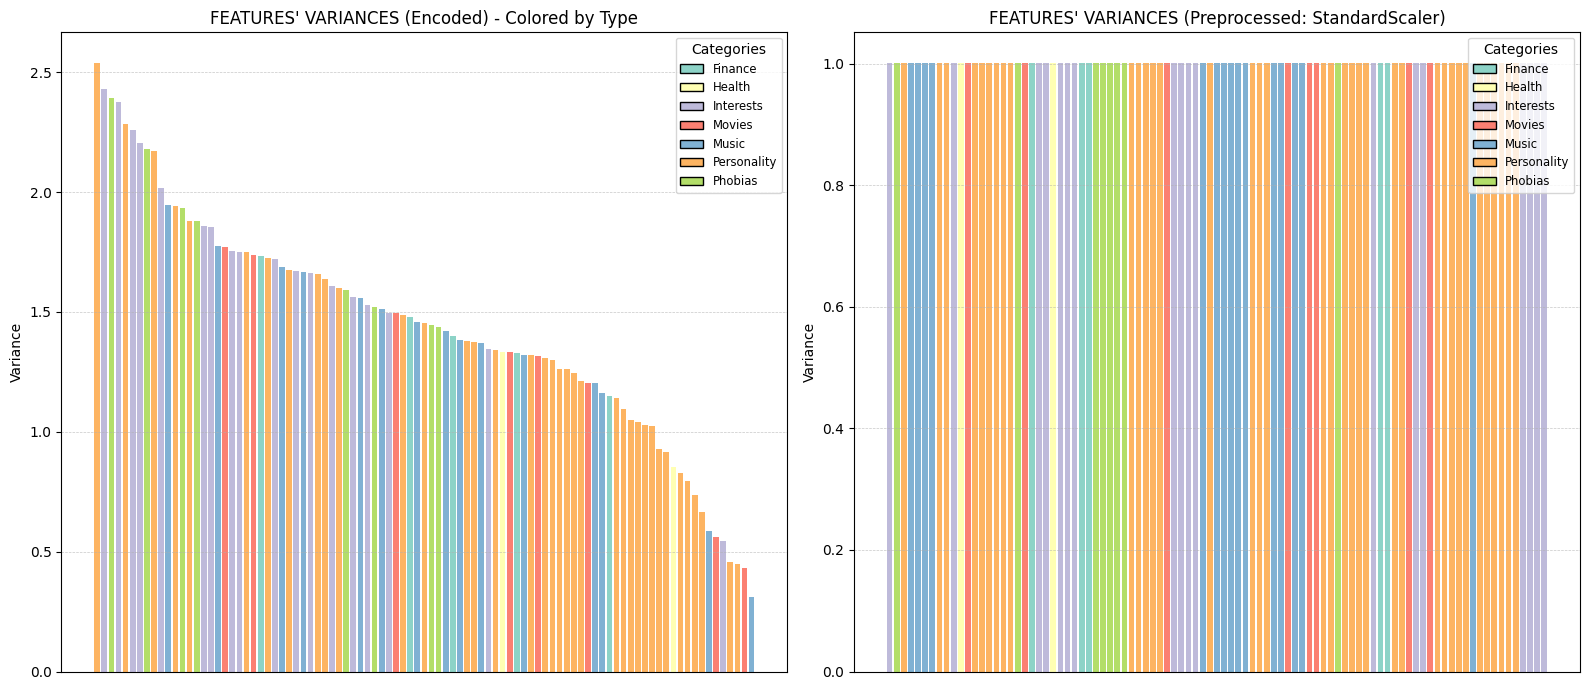

In [53]:
# --- 2.1: FEATURE VARIANCE ANALYSIS ---

# Calculate variance for each feature in the two datasets
# 'responses_ft_enc' contains encoded but unscaled data
# 'responses_ft_pp' contains data after scaling (Standard or MinMax)
var_enc = responses_ft_enc.var()
var_pp = responses_ft_pp.var()

# ---  COLOR AND LEGEND METHOD ---

# 1. Get categories from your initial dictionary
yps_categories = list(features_by_type.keys()) 

# 2. Use the 'Set3' colormap 
# Create a different color for each of your categories (Music, Movies, etc.)
set3_colors = cm.Set3.colors
yps_color_dict = {cat: set3_colors[i % len(set3_colors)] for i, cat in enumerate(yps_categories)}

# 3. Create elements for the LEGEND (the colored patches)
yps_legend_elements = [Patch(facecolor=yps_color_dict[cat], edgecolor='black', label=cat) 
                       for cat in yps_categories]

# 4. Create the final list of colors for the features
feature_colors_list = []
for col in responses_ft_enc.columns:
    found = False
    for cat, f_list in features_by_type.items():
        if col in f_list:
            feature_colors_list.append(yps_color_dict[cat])
            found = True
            break
    if not found: feature_colors_list.append('grey') 

# --- PLOT CREATION ---

# Create plot to compare variances (Fifa Style Cell 12)
plt.figure(figsize=(16, 7))

# Subplot 1: Variance of encoded data (sorted by value for readability)
plt.subplot(1, 2, 1)
sorted_idx_enc = var_enc.sort_values(ascending=False).index
plt.bar(np.arange(len(var_enc)), var_enc[sorted_idx_enc], 
        color=[feature_colors_list[responses_ft_enc.columns.get_loc(c)] for c in sorted_idx_enc])
plt.title('FEATURES\' VARIANCES (Encoded) - Colored by Type')
plt.ylabel('Variance')
plt.xticks([]) 
plt.legend(handles=yps_legend_elements, title="Categories", loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Subplot 2: Variance of preprocessed data
plt.subplot(1, 2, 2)
sorted_idx_pp = var_pp.sort_values(ascending=False).index
plt.bar(np.arange(len(var_pp)), var_pp[sorted_idx_pp], 
        color=[feature_colors_list[responses_ft_pp.columns.get_loc(c)] for c in sorted_idx_pp])
plt.title(f'FEATURES\' VARIANCES (Preprocessed: {your_scaler})')
plt.ylabel('Variance')
plt.xticks([]) 
plt.legend(handles=yps_legend_elements, title="Categories", loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

#### Comment the results obtained for the variances (max 150 words):
The variance analysis vividly demonstrates the necessity of preprocessing. In the encoded dataset (responses_ft_enc), variances are highly heterogeneous; features with broader numerical ranges (e.g., demographic data) exhibit disproportionately high variance compared to variables with limited scales. This imbalance would bias the PCA to prioritize features based solely on magnitude. Conversely, the preprocessed dataset (responses_ft_pp) displays perfectly uniform variance (equal to 1.0) across all features, a direct result of the StandardScaler. This equalization is fundamental: it ensures that the Principal Components are derived from the actual covariance structure (how features vary together) rather than being artificially dominated by variables with larger raw values.

Commento Poz -> alla PCA non interessano le singole varianze delle feature, ma le covarianze fra esse quindi se sale una sale anche l' altra .... la PCA migliore sara quella in cui si riescono a rappresentare piu feature, quindi quella in cui piu feature sono correlate e salgono insieme 
es: tutti quelli che danno voto x alla musica danno lo stesso voto x anche a sport, tv .....

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

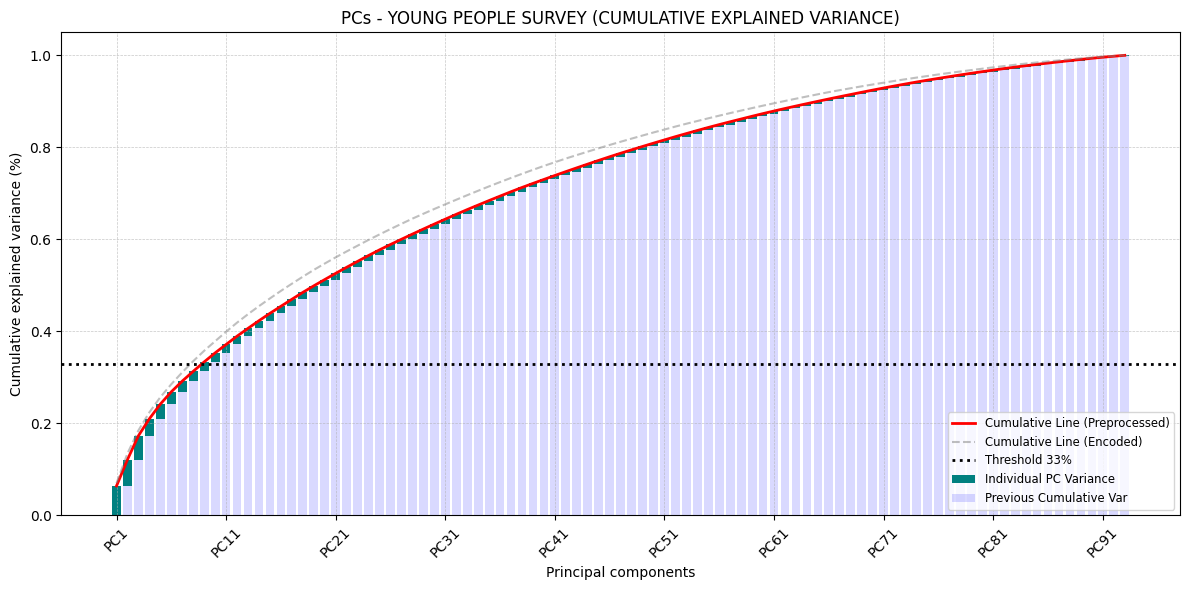

Number of PCs to reach 33% variance (m'): 9


In [54]:
# Initialize PCA to compute all n components (equal to the number of features)
# REMEMBER: With fit, PCA analyzes the correlations between the 150 variables to calculate the weights (loadings) 
# and identify the directions of maximum variance, i.e., the "concepts" that summarize the dataset (PCA).
pca_pp = PCA().fit(responses_ft_pp)
pca_enc = PCA().fit(responses_ft_enc) 

# Calculate the cumulative explained variance
# Cumulative Variance PCn = Sum of all variances up to component n,
# used to decide where to "cut" the number of dimensions (m) needed to cover 33% of the total variance.
cum_var_pp = np.cumsum(pca_pp.explained_variance_ratio_)
cum_var_enc = np.cumsum(pca_enc.explained_variance_ratio_)

n_features = pca_pp.n_features_in_

plt.figure(figsize=(12, 6))

# BARPLOT WITH CUMULATIVE EFFECT 
# The solid bar is the variance of the individual PC, stacked on the previous cumulative value
bottom_val = np.insert(cum_var_pp, 0, 0)[:-1]
plt.bar(np.arange(n_features), pca_pp.explained_variance_ratio_, bottom=bottom_val, 
        color='teal', label='Individual PC Variance')

# The semi-transparent bar shows the previous cumulative "fill"
plt.bar(np.arange(n_features), bottom_val, color='b', alpha=0.15, label='Previous Cumulative Var')

# THE IMPORTANT PART: The red line of the cumulative variance
plt.plot(cum_var_pp, 'r', linewidth=2, label='Cumulative Line (Preprocessed)')
plt.plot(cum_var_enc, 'gray', linestyle='--', alpha=0.5, label='Cumulative Line (Encoded)')

# Reference line at 33% 
plt.axhline(y=0.33, color='black', linestyle=':', linewidth=2, label='Threshold 33%')

plt.title('PCs - YOUNG PEOPLE SURVEY (CUMULATIVE EXPLAINED VARIANCE)')
# We use a step of 10 for the labels because 150 PCs are too many to visualize individually
plt.xticks(ticks=np.arange(0, n_features, 10), rotation=45, 
           labels=[f'PC{i}' for i in range(1, n_features + 1, 10)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

# Calculation of m'
# cum_var_pp takes the first index of the value that meets the condition >= 0.33 (+1 because it starts from 0)
# Ex: [0.15, 0.28, 0.30, 0.42, ...] -> [False, False, False, True, ...] -> 4 components to reach var = 33%
# cum_var_pp[3] = 0.42 = Var(PCA1) + Var(PCA2) + Var(PCA3) + Var(PCA4)  
m_prime = np.argmax(cum_var_pp >= 0.33) + 1
print(f"Number of PCs to reach 33% variance (m'): {m_prime}")

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):
The cumulative explained variance plot illustrates PCA's ability to synthesize dataset information. In the unscaled data (responses_ft_enc), the curve rises steeply because a few high-variance features dominate the initial components. Conversely, in the preprocessed dataset (responses_ft_pp), the ascent is more gradual, reflecting a more democratic distribution of information across variables due to standardization. Notably, a relatively small number of components is sufficient to explain the required 33% of total variance compared to the original feature count. This confirms PCA's effectiveness in dimensionality reduction, condensing over a hundred questions into a few latent concepts without excessive signal loss, which is crucial for the subsequent customer profiling and clustering phases.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

Number of selected components (m): 5


<>:62: SyntaxWarning: invalid escape sequence '\e'
<>:62: SyntaxWarning: invalid escape sequence '\e'
C:\Users\lisav\AppData\Local\Temp\ipykernel_21952\1572802385.py:62: SyntaxWarning: invalid escape sequence '\e'
  plt.plot([-0.5, pca_m.n_features_in_ - 0.5], [eps, eps], 'red', label=f'Threshold $\epsilon$')


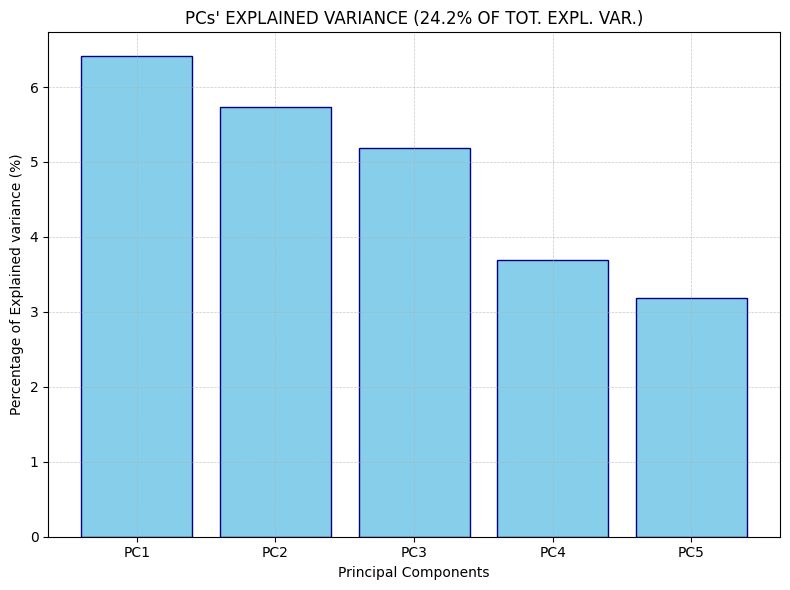

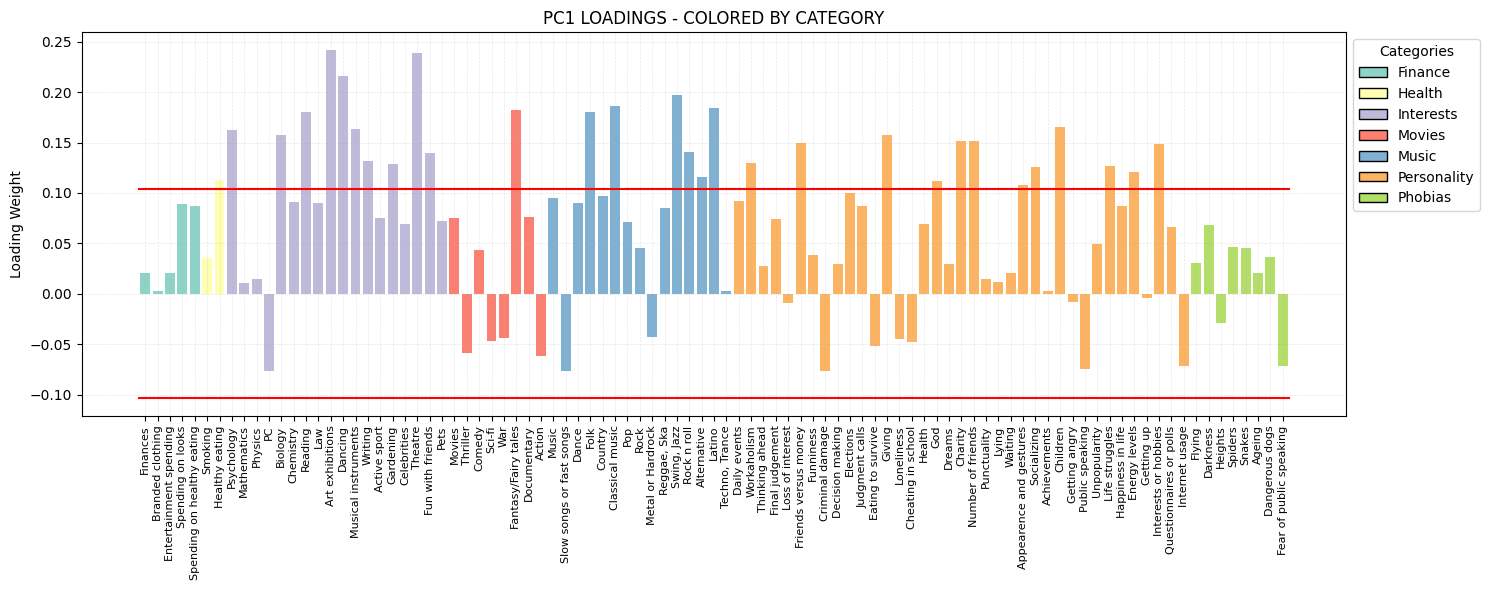

****************** PC1 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Healthy eating', 'Psychology', 'Biology', 'Reading', 'Art exhibitions', 'Dancing', 'Musical instruments', 'Writing', 'Gardening', 'Theatre', 'Fun with friends', 'Fantasy/Fairy tales', 'Folk', 'Classical music', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Workaholism', 'Friends versus money', 'Giving', 'God', 'Charity', 'Number of friends', 'Appearence and gestures', 'Socializing', 'Children', 'Life struggles', 'Energy levels', 'Interests or hobbies']
HIGH-VALUED NEGATIVE COMPONENTS: []



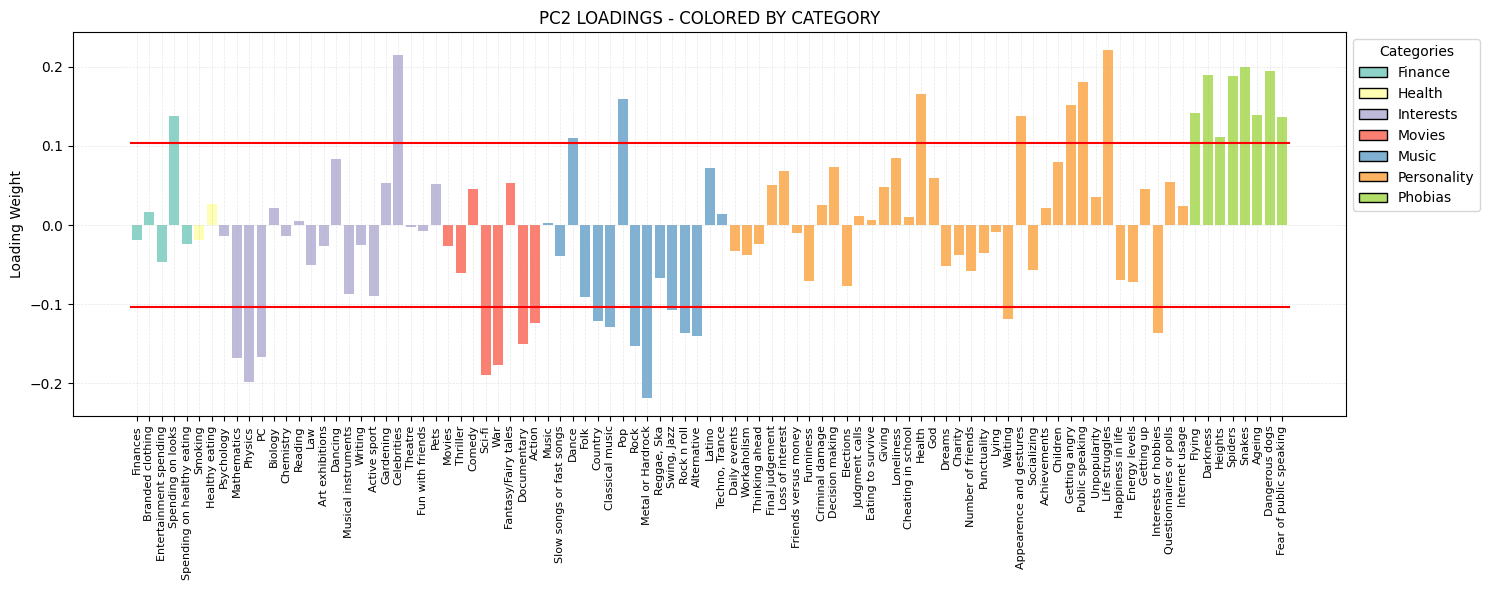

****************** PC2 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Spending on looks', 'Celebrities', 'Dance', 'Pop', 'Health', 'Appearence and gestures', 'Getting angry', 'Public speaking', 'Life struggles', 'Flying', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
HIGH-VALUED NEGATIVE COMPONENTS: ['Mathematics', 'Physics', 'PC', 'Sci-fi', 'War', 'Documentary', 'Action', 'Country', 'Classical music', 'Rock', 'Metal or Hardrock', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Waiting', 'Interests or hobbies']



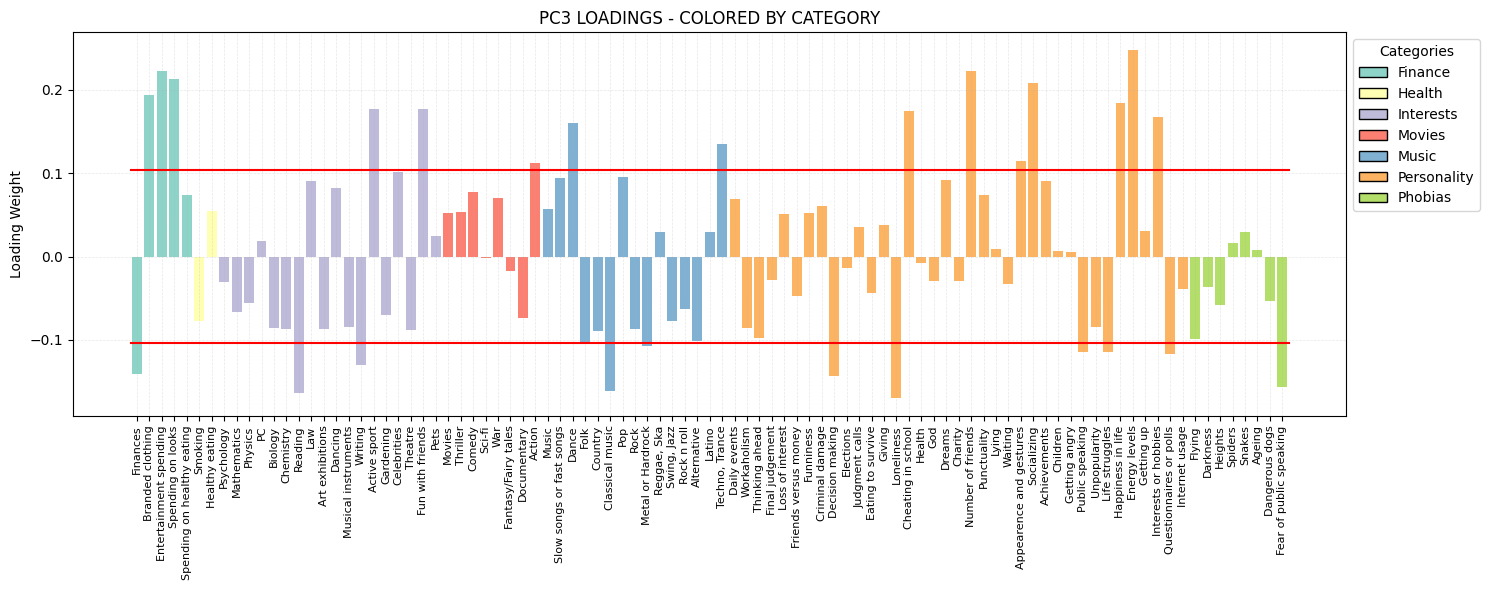

****************** PC3 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Branded clothing', 'Entertainment spending', 'Spending on looks', 'Active sport', 'Fun with friends', 'Action', 'Dance', 'Techno, Trance', 'Cheating in school', 'Number of friends', 'Appearence and gestures', 'Socializing', 'Happiness in life', 'Energy levels', 'Interests or hobbies']
HIGH-VALUED NEGATIVE COMPONENTS: ['Finances', 'Reading', 'Writing', 'Classical music', 'Metal or Hardrock', 'Decision making', 'Loneliness', 'Public speaking', 'Life struggles', 'Questionnaires or polls', 'Fear of public speaking']



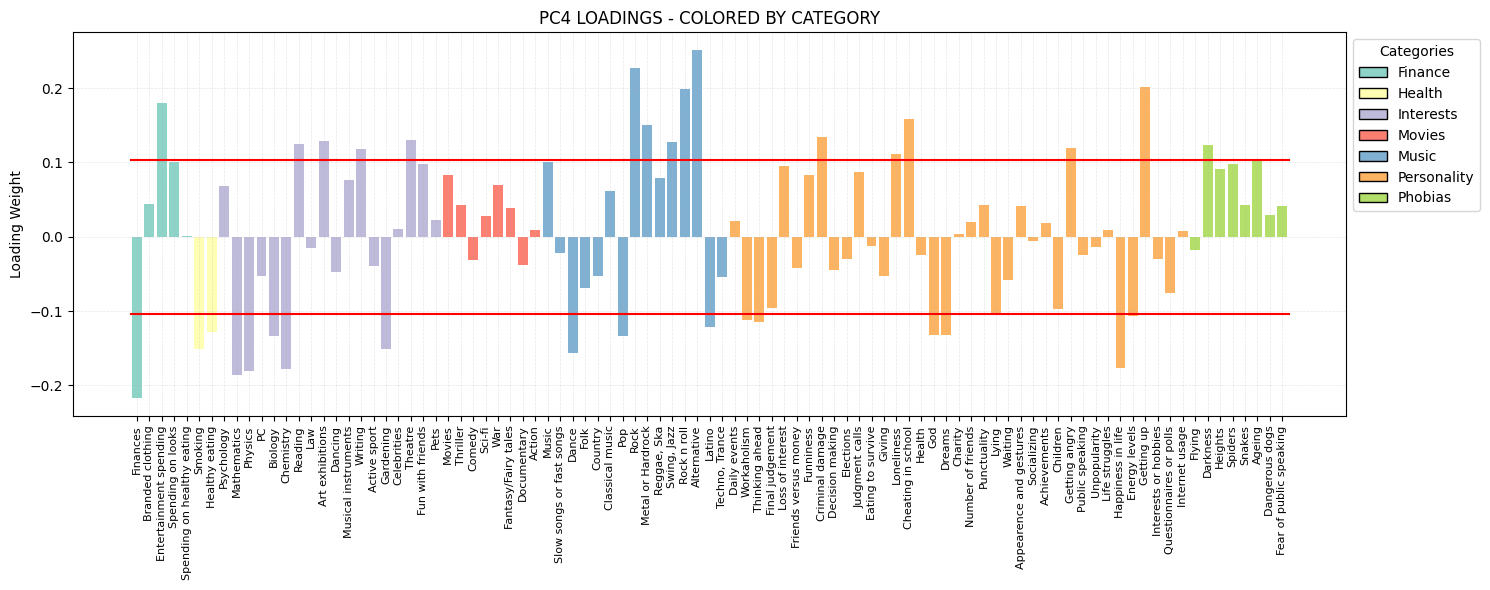

****************** PC4 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Entertainment spending', 'Reading', 'Art exhibitions', 'Writing', 'Theatre', 'Rock', 'Metal or Hardrock', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Criminal damage', 'Loneliness', 'Cheating in school', 'Getting angry', 'Getting up', 'Darkness']
HIGH-VALUED NEGATIVE COMPONENTS: ['Finances', 'Smoking', 'Healthy eating', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Gardening', 'Dance', 'Pop', 'Latino', 'Workaholism', 'Thinking ahead', 'God', 'Dreams', 'Happiness in life', 'Energy levels']



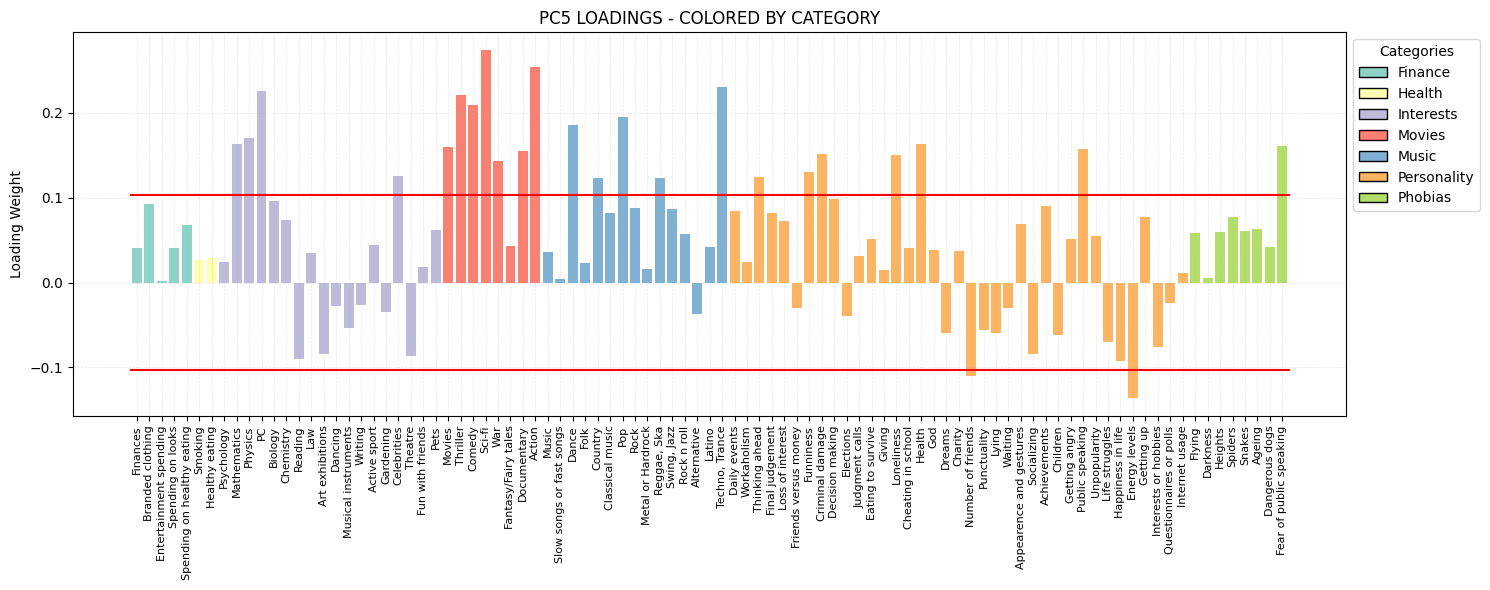

****************** PC5 ******************
HIGH-VALUED POSITIVE COMPONENTS: ['Mathematics', 'Physics', 'PC', 'Celebrities', 'Movies', 'Thriller', 'Comedy', 'Sci-fi', 'War', 'Documentary', 'Action', 'Dance', 'Country', 'Pop', 'Reggae, Ska', 'Techno, Trance', 'Thinking ahead', 'Funniness', 'Criminal damage', 'Loneliness', 'Health', 'Public speaking', 'Fear of public speaking']
HIGH-VALUED NEGATIVE COMPONENTS: ['Number of friends', 'Energy levels']



In [55]:
# --- STEP 1: CALCULATION OF m ---
# m_prime is the number of PCs for 33% of the variance (calculated in ex. 2)
# The instructions require m = min(m', 5)
m = min(m_prime, 5)
print(f"Number of selected components (m): {m}")

# INITIALIZE THE PCA WITH m COMPONENTS
pca_m = PCA(n_components = m)

# FIT THE PCA ON PREPROCESSED DATA
pca_m.fit(responses_ft_pp)

# COMPUTE THE PERCENTAGE OF TOT. EXPL. VARIANCE RATIO (ROUNDED TO 2 DECIMALS)
round_expl_var_ratio = np.round(pca_m.explained_variance_ratio_.sum() * 100, decimals=2)
 
# DEFINE EPSILON (Threshold based on the number of features)
eps = np.sqrt(1 / pca_m.n_features_in_)

# --- COLOR AND LEGEND PREPARATION ---

# 1. Get categories from the initial dictionary
yps_categories = list(features_by_type.keys()) 

# 2. Use the 'Set3' colormap 
set3_colors = cm.Set3.colors
yps_color_dict = {cat: set3_colors[i % len(set3_colors)] for i, cat in enumerate(yps_categories)}

# 3. Create elements for the LEGEND (the colored patches)
yps_legend_elements = [Patch(facecolor=yps_color_dict[cat], edgecolor='black', label=cat) 
                       for cat in yps_categories]

# 4. Create the final list of colors for the features
feature_colors_list = []
for col in responses_ft_pp.columns:
    category = next((t for t, f_list in features_by_type.items() if col in f_list), 'Other')
    feature_colors_list.append(yps_color_dict.get(category, 'grey'))

# --- STEP 2: VISUALIZATION OF SELECTED PCs' VARIANCE ---

# MAKE THE BARPLOT OF EXPLAINED VARIANCE FOR EACH PC
plt.figure(figsize=(8, 6))
plt.bar(range(1, m+1), pca_m.explained_variance_ratio_ * 100, color='skyblue', edgecolor='navy')
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio}% OF TOT. EXPL. VAR.)") 
plt.xticks(ticks=np.arange(1, m + 1), 
           labels=[f'PC{i}' for i in range(1, m + 1)],
           rotation=0)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance (%)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7) 
plt.tight_layout()
plt.show()

# --- STEP 3: VISUALIZATION OF LOADINGS (WEIGHTS) ---

# FOR-CYCLE TO VISUALIZE ALL THE PCs AS BARPLOTS
for ii in range(m):
    plt.figure(figsize=(15, 6))
    # Use the list of categorical colors 
    plt.bar(np.arange(pca_m.n_features_in_), pca_m.components_[ii, :], color=feature_colors_list)
    
    # RED LINE DENOTING THE THRESHOLD [-eps, +eps]
    plt.plot([-0.5, pca_m.n_features_in_ - 0.5], [eps, eps], 'red', label=f'Threshold $\epsilon$')
    plt.plot([-0.5, pca_m.n_features_in_ - 0.5], [-eps, -eps], 'red')
    
    plt.xticks(ticks=np.arange(pca_m.n_features_in_), 
               rotation=90, 
               labels=responses_ft_pp.columns,
               fontsize=8)
    plt.title(f'PC{ii + 1} LOADINGS - COLORED BY CATEGORY')
    plt.ylabel('Loading Weight')
    
    # ADD THE LEGEND 
    plt.legend(handles=yps_legend_elements, title="Categories", loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # SELECTION OF THE FEATURES WITH CONTRIBUTION GREATER THAN THE THRESHOLD
    features = responses_ft_pp.columns
    ind_great_pos_PCii = np.argwhere(pca_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [features[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [features[i] for i in ind_great_neg_PCii]
    
    print(f'****************** PC{ii + 1} ******************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('')

# --- STEP 4: TRANSFORM ---
# Transform data into the new m-dimensional space
responses_ft_pca_values = pca_m.transform(responses_ft_pp)
responses_ft_pca = pd.DataFrame(
    responses_ft_pca_values,
    columns=[f'PC{i+1}' for i in range(m)],
    index=responses_ft_pp.index
)

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

### PC1: Disengagement (+) vs Cultural & Social Engagement (-)
This component serves as a measure of general life engagement. The negative pole is heavily loaded with a diverse array of variables, spanning Culture and Arts (Reading, Theatre, Classical music), Social Life (Socializing, Fun with friends), and Altruistic Values (Giving, Charity). Conversely, the positive pole is virtually empty. Consequently, this component effectively differentiates between individuals with a "full", active, and socially connected lifestyle (negative scores) and those exhibiting general detachment or apathy toward most activities (positive scores).

### PC2: Rationality & Hard Interests (+) vs. Image, Anxiety & Phobias (-)
This component contrasts a rational, structured mindset with one driven by emotion and image. The positive pole (+) defines an analytical, intellectual profile with strong STEM interests (Mathematics, Physics) and complex cultural tastes (Classical music, Metal), implying a steady, patient character. Conversely, the negative pole (-) depicts a personality focused on outward appearance (Spending on looks, Pop) but deeply vulnerable. This side is heavily loaded with various phobias (Spiders, Heights, Darkness) and indicators of emotional instability (Getting angry, Life struggles).

### PC3: Social Status & Extroversion (+) vs. Introspection & Solitude (-)
This component draws a sharp distinction between an extroverted, materialistic lifestyle and an introverted, introspective one. The positive pole (+) defines a high-energy, consumption-driven profile focused on social image (Branded clothing, Spending on looks). It features intense socialization (Fun with friends, Dance), rhythmic musical tastes (Techno), and a carefree, sometimes ethically lax attitude (Cheating in school), yet correlates with happiness (Happiness in life). Conversely, the negative pole (-) outlines a solitary, intellectual personality dedicated to deep cultural pursuits (Reading, Writing, Classical music, Metal) and responsible management (Finances, Decision Making), yet marked by isolation (Loneliness) and social anxiety (Fear of public speaking).

### PC4: Alternative Arts & Instability (+) vs. Science, Order & Well-being (-)
This component contrasts an artistic, rebellious temperament with rational stability. The positive pole (+) describes a tormented or nonconformist profile: strong alternative cultural and musical interests (Writing, Theatre, Rock, Metal) coexist with emotional instability (Loneliness, Getting angry, Darkness) and risky behaviors (Criminal damage, Cheating in school). Conversely, the negative pole (-) outlines a bright, constructive, and highly structured personality. It is dominated by scientific subjects (Mathematics, Physics, Chemistry), responsible future planning (Finances, Thinking ahead), and general psycho-physical well-being coupled with traditional values (Happiness in life, God, Healthy eating).

### PC5: Social Vitality & Energy (+) vs. Cultural Saturation & Anxiety (-)
This component contrasts social vitality with complex introspection. The positive pole (+) defines a high-energy, sociable profile driven by Number of friends and Energy levels, yet lacking specific hobbies. Conversely, the negative pole (-) identifies a culturally and intellectually dense profile, loaded with interests in Science (Mathematics, Physics), Cinema (Movies, Sci-fi), and Music (Pop, Country). However, this intellectual depth is paired with significant social and emotional distress, manifested as Loneliness and Fear of public speaking. Ultimately, it distinguishes between exterior energetic lightness and a content-rich but socially anxious existence.

#### Write the code for visualizing the score graph (with PC names on the axis):

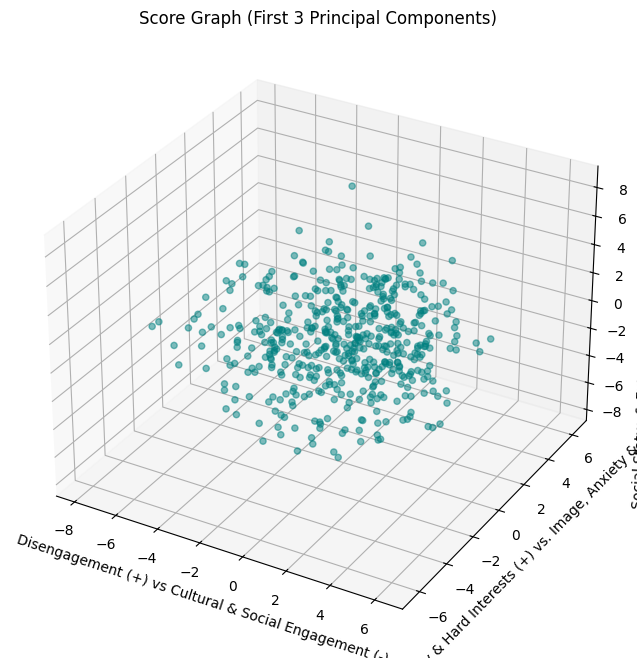

In [56]:
# LIST OF THE NAMES ASSIGNED TO THE THREE PCs
pc_names = ['Disengagement (+) vs Cultural & Social Engagement (-)',
            'Rationality & Hard Interests (+) vs. Image, Anxiety & Phobias (-)',
            'Social Status & Extroversion (+) vs. Introspection & Solitude (-)']

if m >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(responses_ft_pca['PC1'], responses_ft_pca['PC2'], responses_ft_pca['PC3'], 
               c='teal', alpha=0.5, s=20)
    
    ax.set_xlabel(pc_names[0])
    ax.set_ylabel(pc_names[1])
    ax.set_zlabel(pc_names[2])
    plt.title('Score Graph (First 3 Principal Components)')
    plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

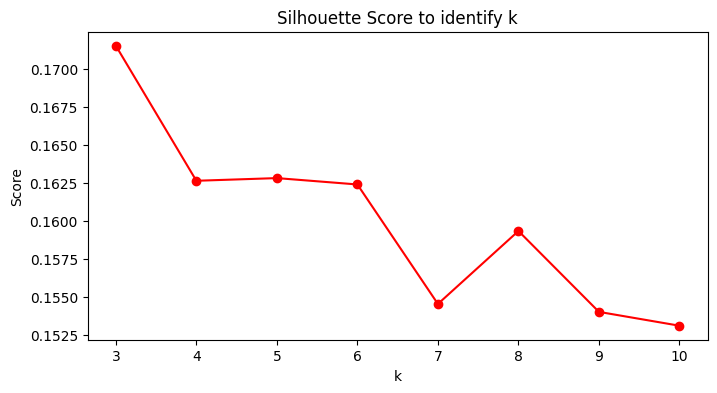

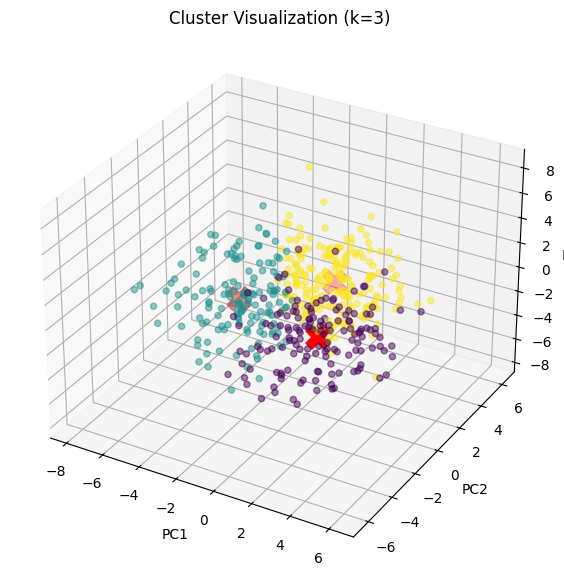

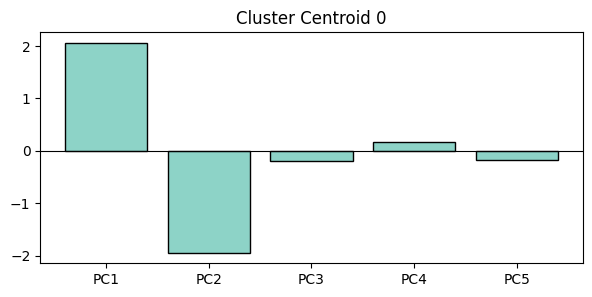

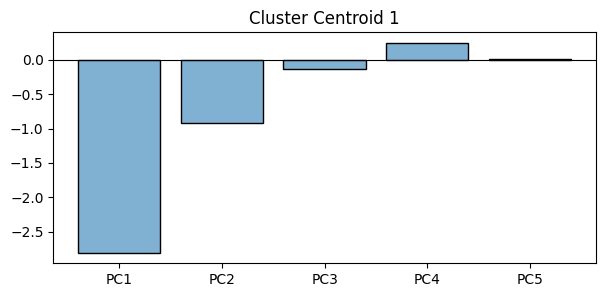

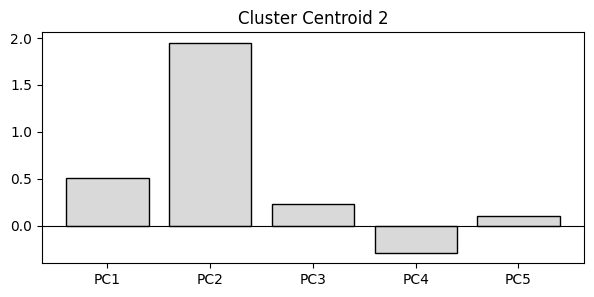

In [57]:
# 1. Find the best k (3-10)
k_range = range(3, 11)
sil_scores = []
X_clustering = responses_ft_pca.iloc[:, :m] # Use only the m components

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=random_seed)
    labels = km.fit_predict(X_clustering)
    sil_scores.append(silhouette_score(X_clustering, labels))

# Plot Silhouette
plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, 'ro-')
plt.title('Silhouette Score to identify k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

# 2. Final clustering with the best k
best_k = k_range[np.argmax(sil_scores)]
km_final = KMeans(n_clusters=best_k, n_init=10, random_state=random_seed)
cluster_labels = km_final.fit_predict(X_clustering)
centroids = km_final.cluster_centers_

# 3. 3D Score Graph with Centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_clustering.iloc[:, 0], X_clustering.iloc[:, 1], X_clustering.iloc[:, 2], 
                     c=cluster_labels, cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='X', s=300, c='red', label='Centroids')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title(f'Cluster Visualization (k={best_k})')
plt.show()

# 4. Visualization of Centroids as Barplots (Use these to assign names!)
for i in range(best_k):
    plt.figure(figsize=(7, 3))
    plt.bar(range(1, m+1), centroids[i], color=plt.cm.Set3(i/best_k), edgecolor='black')
    plt.xticks(range(1, m+1), [f'PC{j}' for j in range(1, m+1)])
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f'Cluster Centroid {i}')
    plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

### Cluster 0: "The Engaged Rationals" 
This profile is defined by the convergence of two driving forces: a strongly negative PC1 ($\approx -2.0$), indicating insatiable curiosity and an active lifestyle, and a highly positive PC2 ($\approx +2.0$), which channels this energy toward pure rationality, STEM subjects, and emotional stability. The neutrality of the other components (PC3, PC4, PC5) highlights a solid, essential character: they seek neither artistic rebellion (PC4) nor popularity for its own sake (PC5). These are voracious, analytical minds focused on a structured understanding of the world rather than on appearance or emotions.

### Cluster 1: "The Stoic Minimalists"
The distinctive trait here is behavioral minimalism, driven by an extremely positive PC1 ($\approx +2.8$) signaling apathy and a lack of specific interests and of sporting and cultural engagement. However, the positive PC2 ($\approx +0.9$) frames this "inaction" not as distress but as a phlegmatic, rational calm, devoid of the anxieties or fashion dependence typical of a negative PC2. With PC3, PC4, and PC5 effectively flat, the profile reveals no hidden extroversion or nonconformity. They are silent observers living an essential existence, free from emotional peaks and focused on pragmatic tranquility.

### Cluster 2: "The Sensitive Socialites"
This profile filters reality through emotion and appearance. The dominant trait is a strongly negative PC2, combining a focus on aesthetics and pop trends with marked inner vulnerability (phobias, anxiety). They are not passive: the negative PC1 indicates engagement, but it is channeled by the positive PC3 toward worldliness and shopping. Crucially, the neutral components show they are neither rebellious (PC4) nor obsessed with mere friend quantity (PC5); their sociality relies on appearance and external validation, balancing a vibrant social life with a fragile sensitivity. The slight influence of a negative PC4 suggests a need for conventional order for reassurance.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):
1. Gender: crucial for validating PC2 interpretation. Since the second component contrasts stereotypically "masculine" interests (tech, physics) with "feminine" ones (fashion, shopping), we expect strong gender segregation between Cluster 0 ("Committed Scientists") and Cluster 2 ("Emotional Esthetes") to confirm the clustering logic.

2. Education: selected to test if the intellectual engagement (negative PC1) correlates with formal education levels. It aims to clarify whether the apathy observed in Cluster 1 ("Logical Detached") stems from a lack of academic tools or is simply a personality trait independent of schooling.

3. Age: essential for contextualizing psychological profiles. We aim to determine if the emotional detachment of Cluster 1 reflects a transient adolescent phase. Conversely, we hypothesize that the structured, intellectual profile of the "Scientists" (Cluster 0) correlates with a more mature demographic.

4. Home Town Type: included to analyze environmental influence on lifestyle. We hypothesize that Cluster 2 ("Emotional Esthetes"), heavily focused on appearance, shopping, and socializing, will be more prevalent in urban contexts ("City"), which offer greater stimulation for these activities compared to rural "Village" settings.

#### Write the code for the visualizations cited in item 2 above:

C:\Users\lisav\AppData\Local\Temp\ipykernel_21952\1402515817.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('tab10')


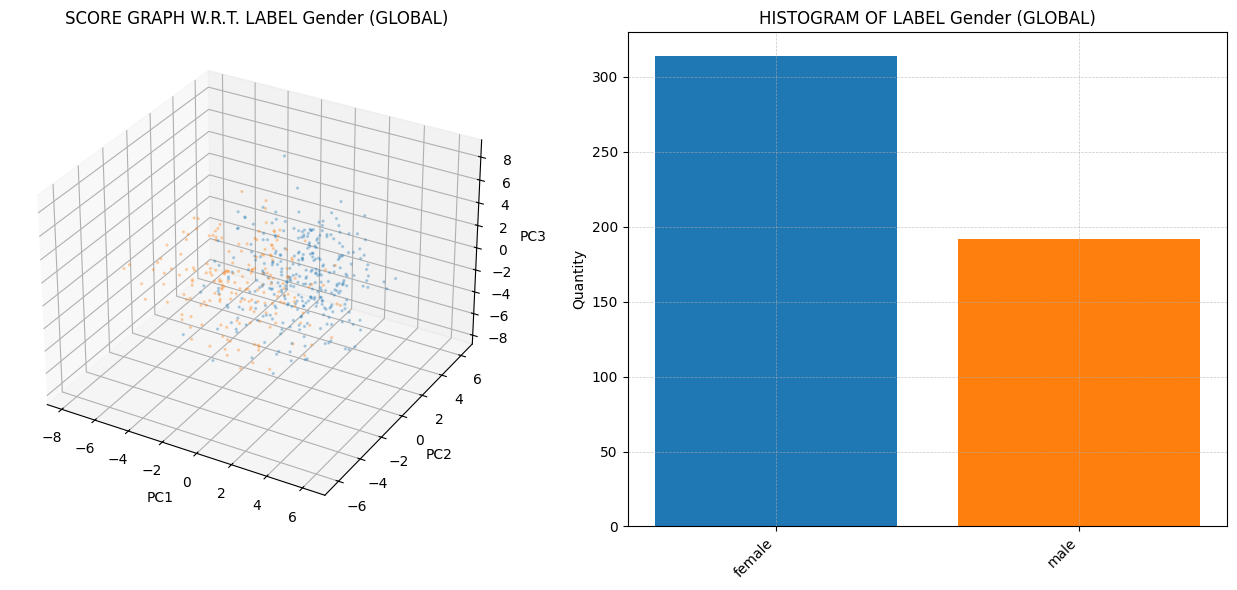

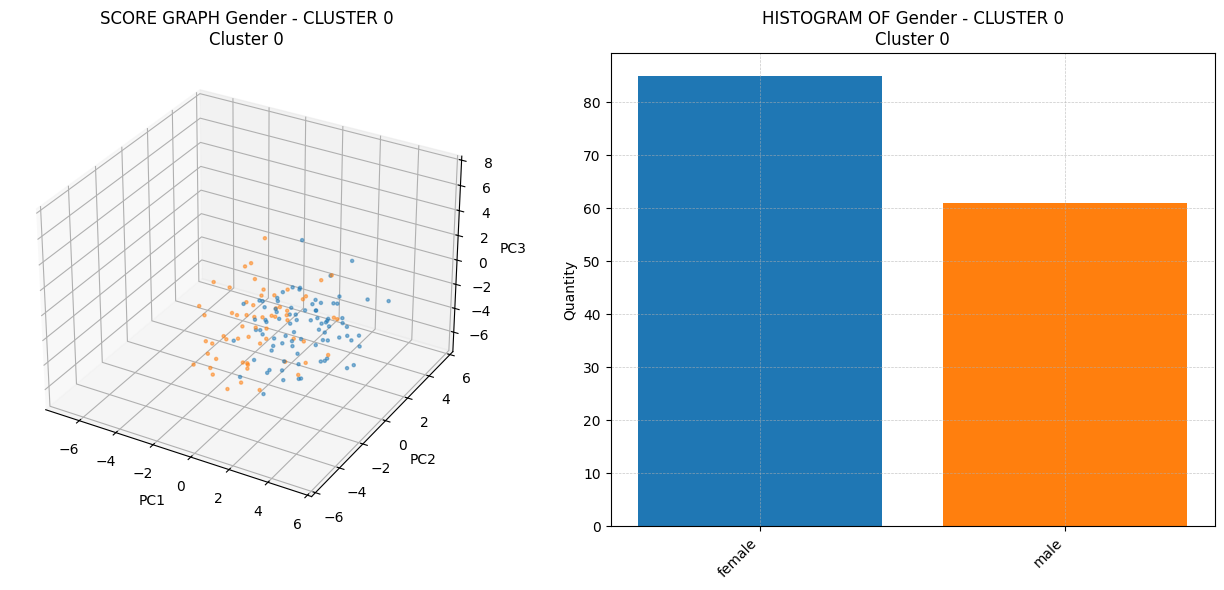

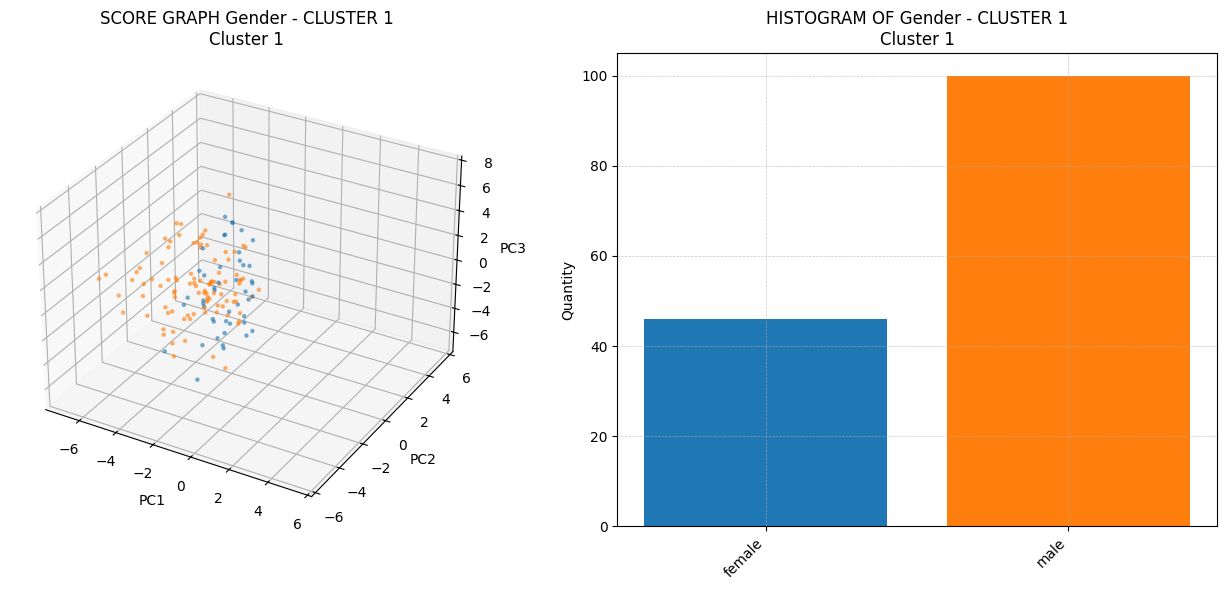

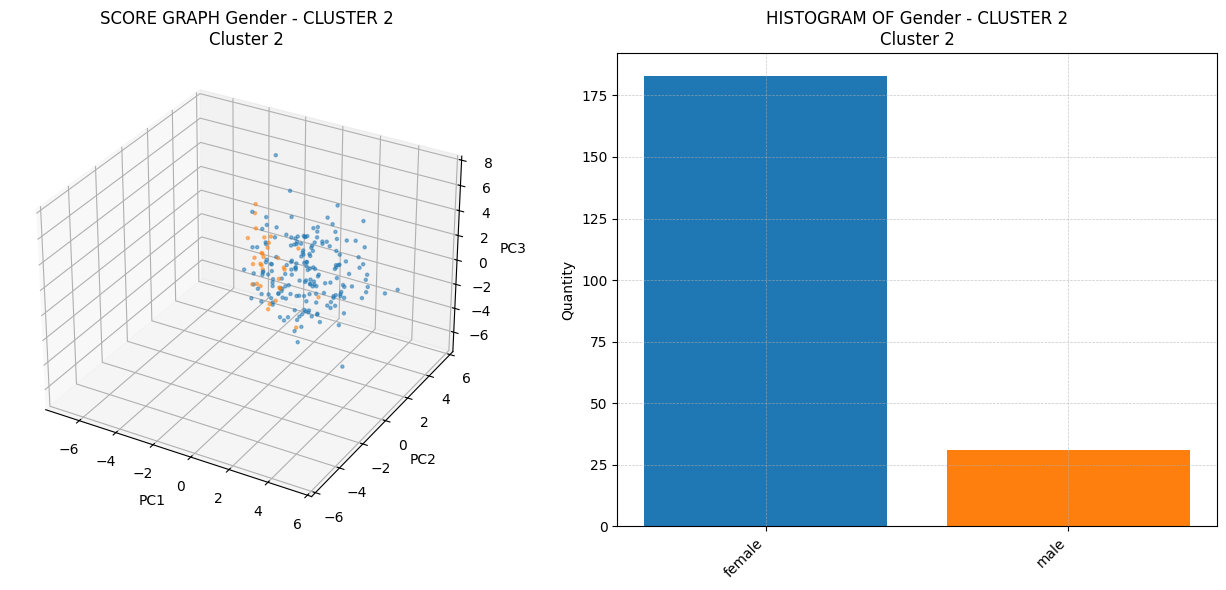

C:\Users\lisav\AppData\Local\Temp\ipykernel_21952\1402515817.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('viridis')


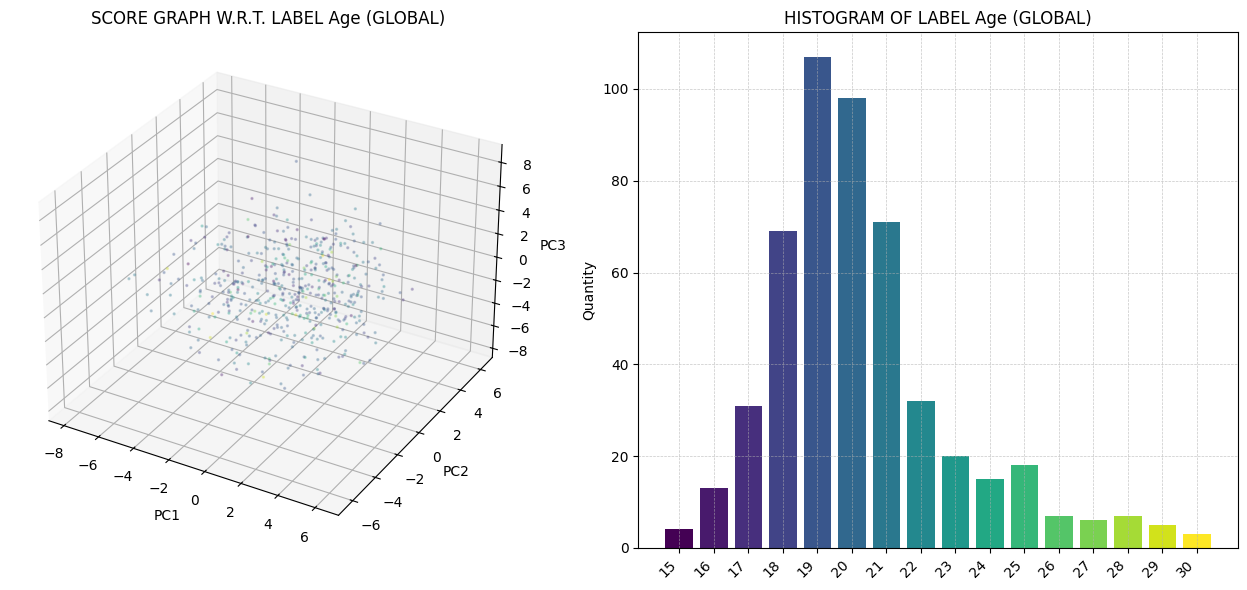

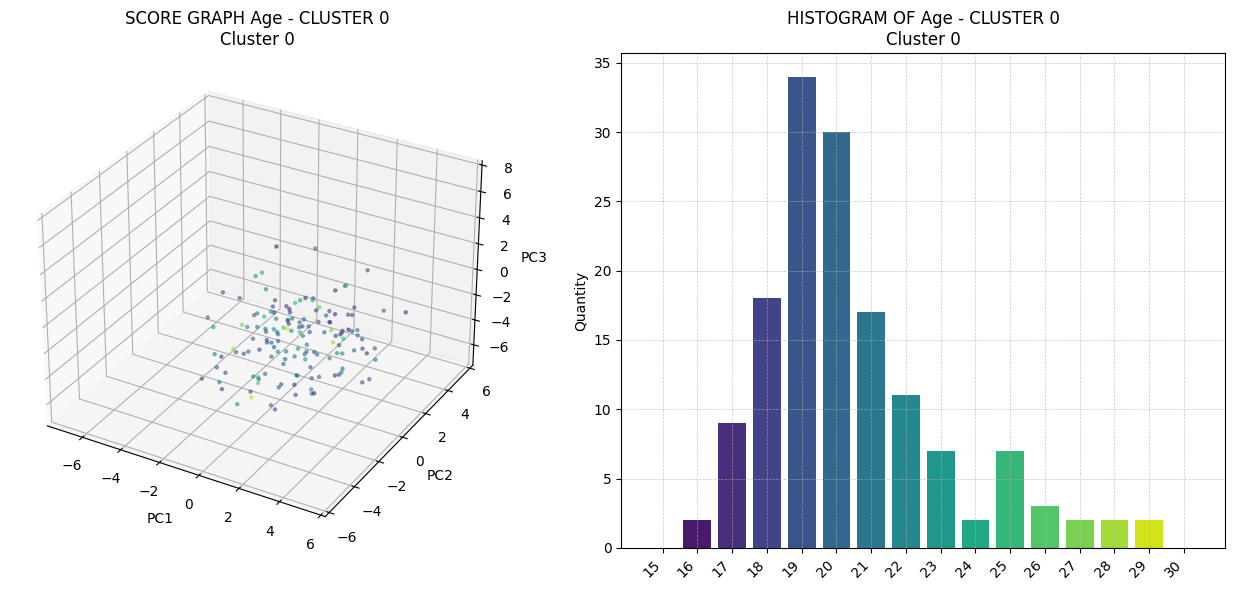

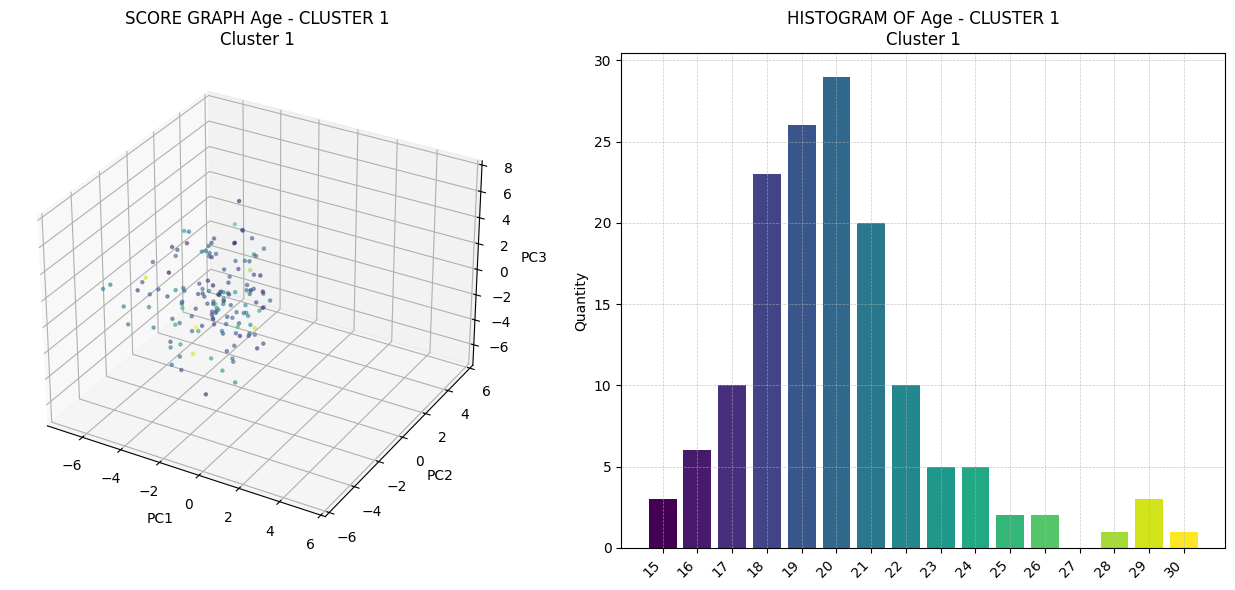

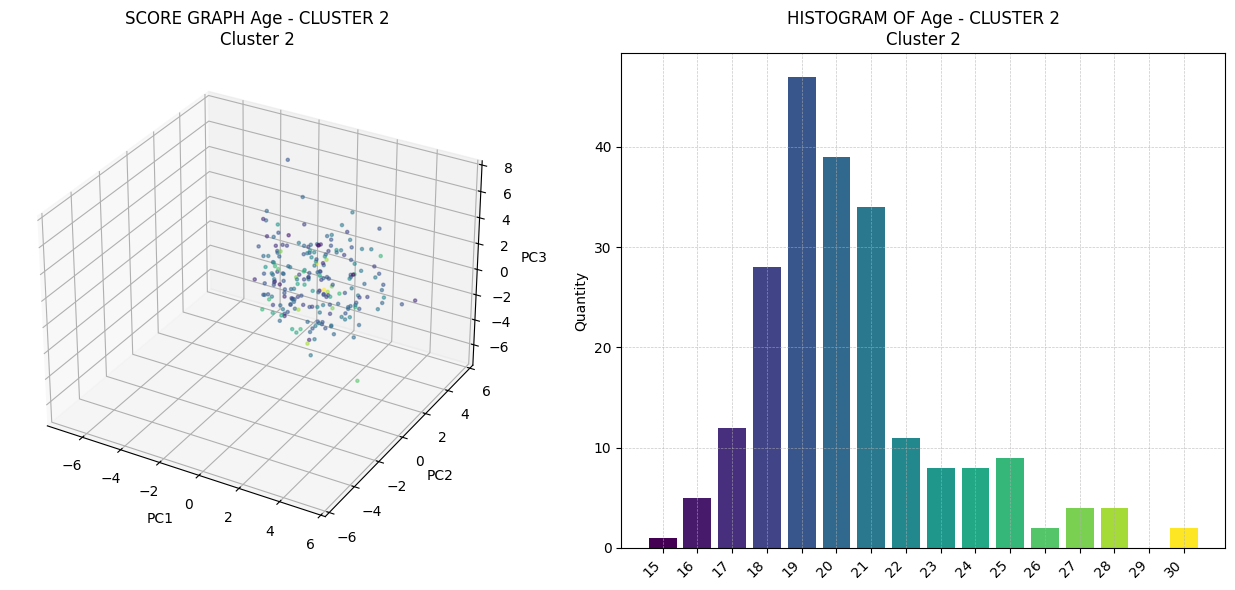

C:\Users\lisav\AppData\Local\Temp\ipykernel_21952\1402515817.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('tab10')


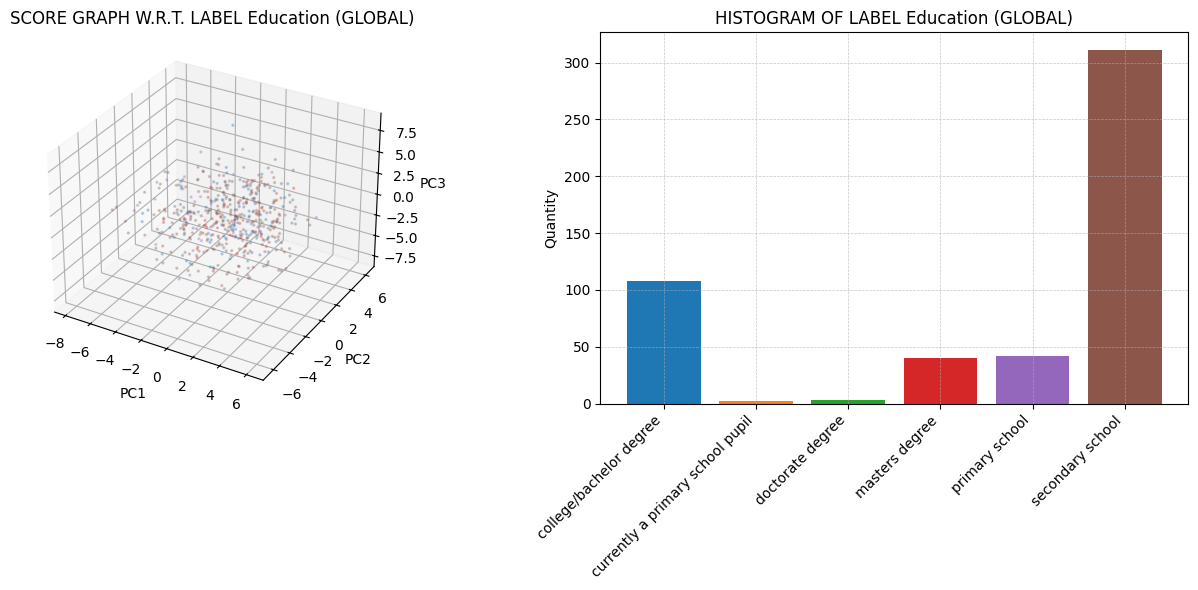

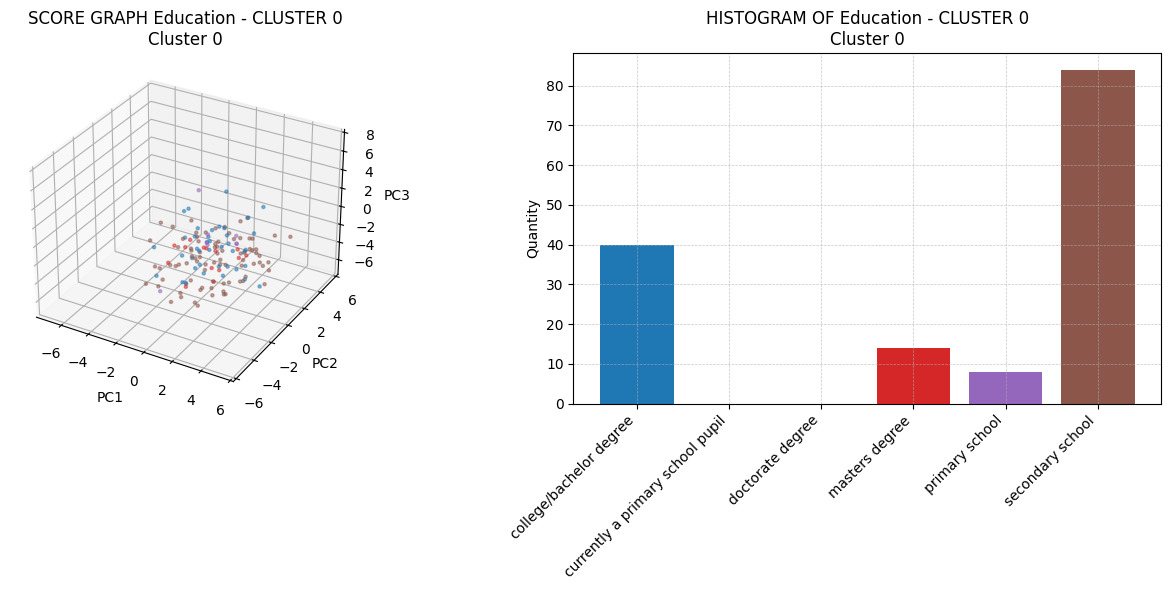

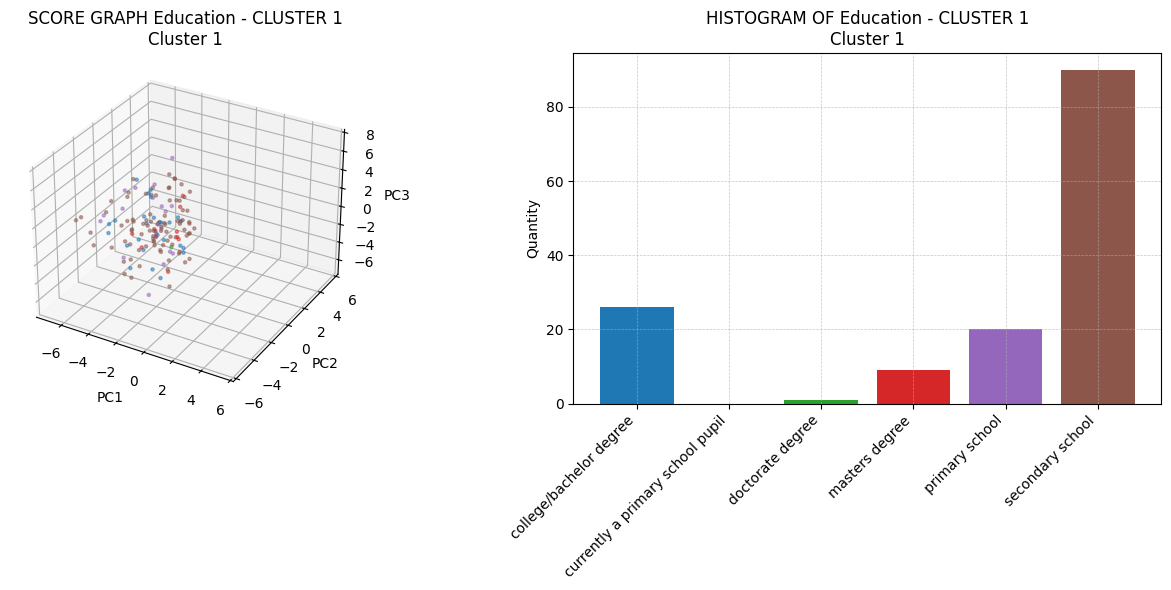

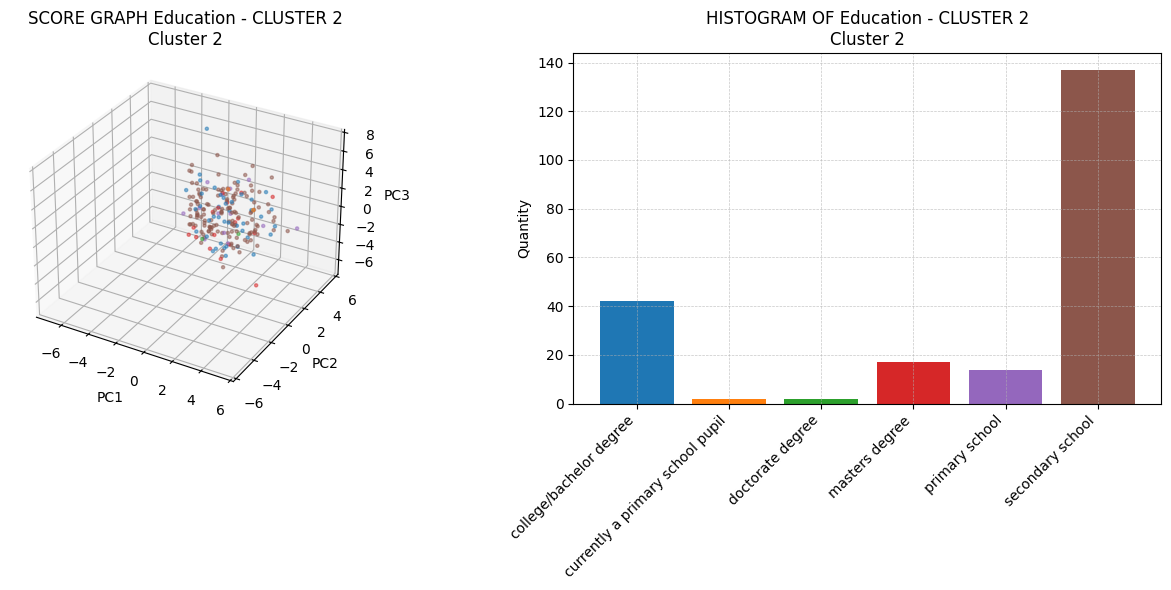

C:\Users\lisav\AppData\Local\Temp\ipykernel_21952\1402515817.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap('tab10')


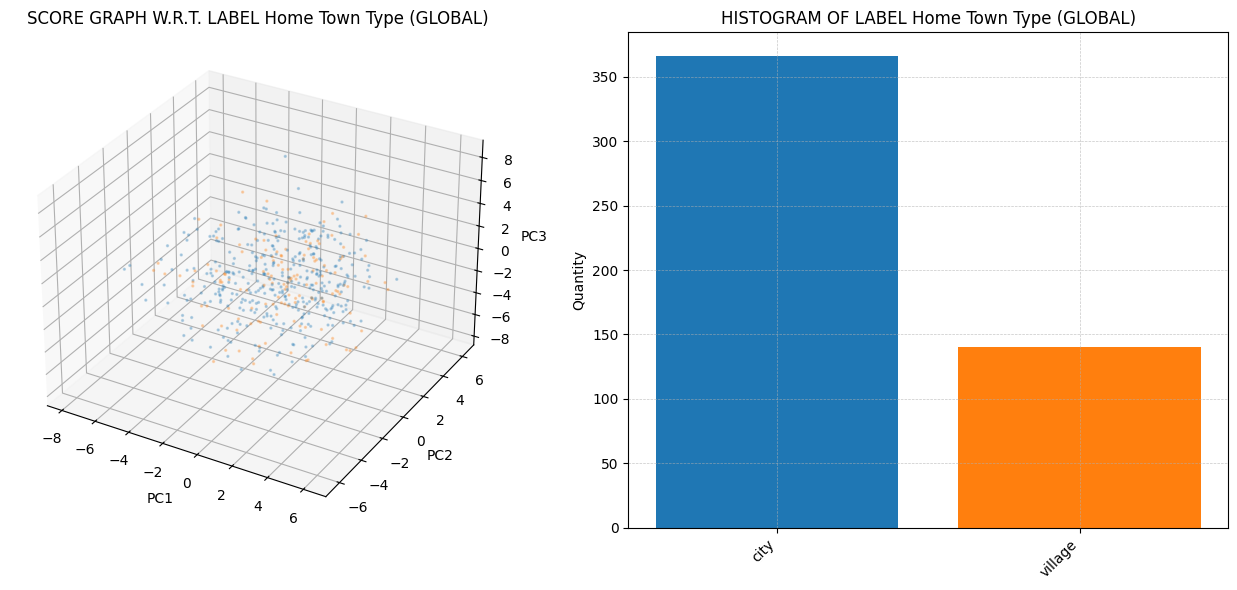

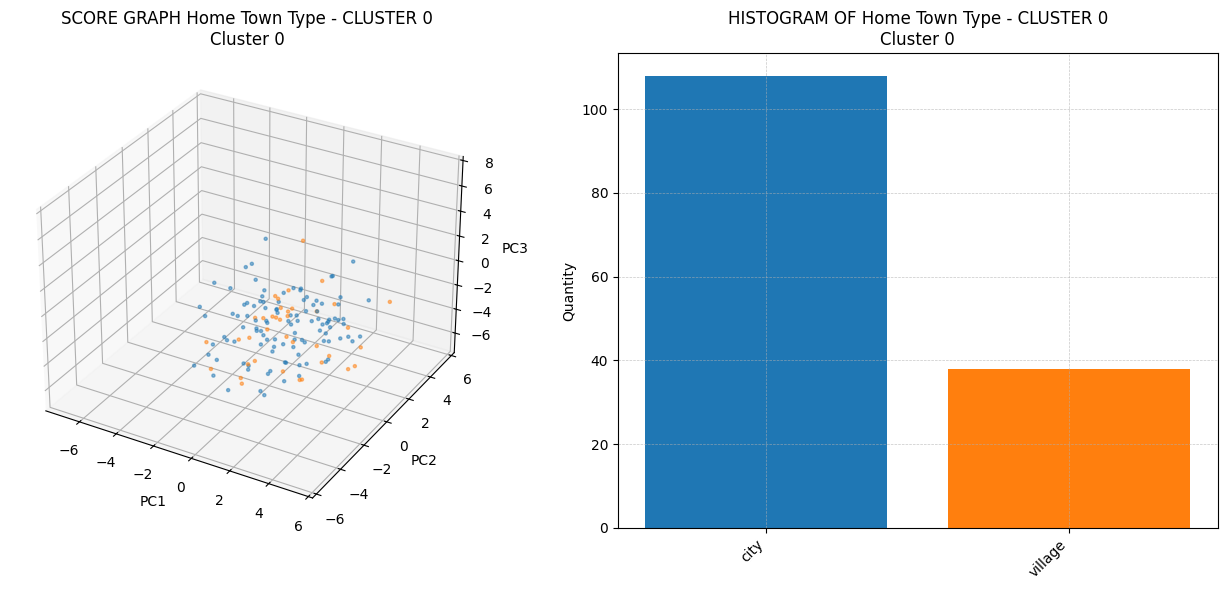

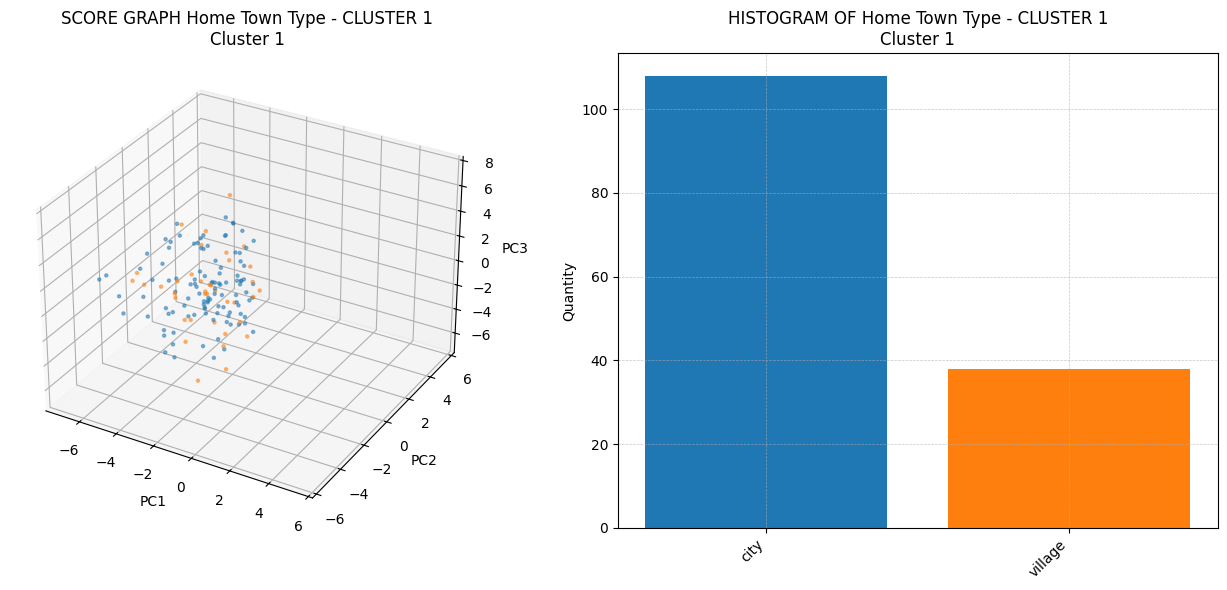

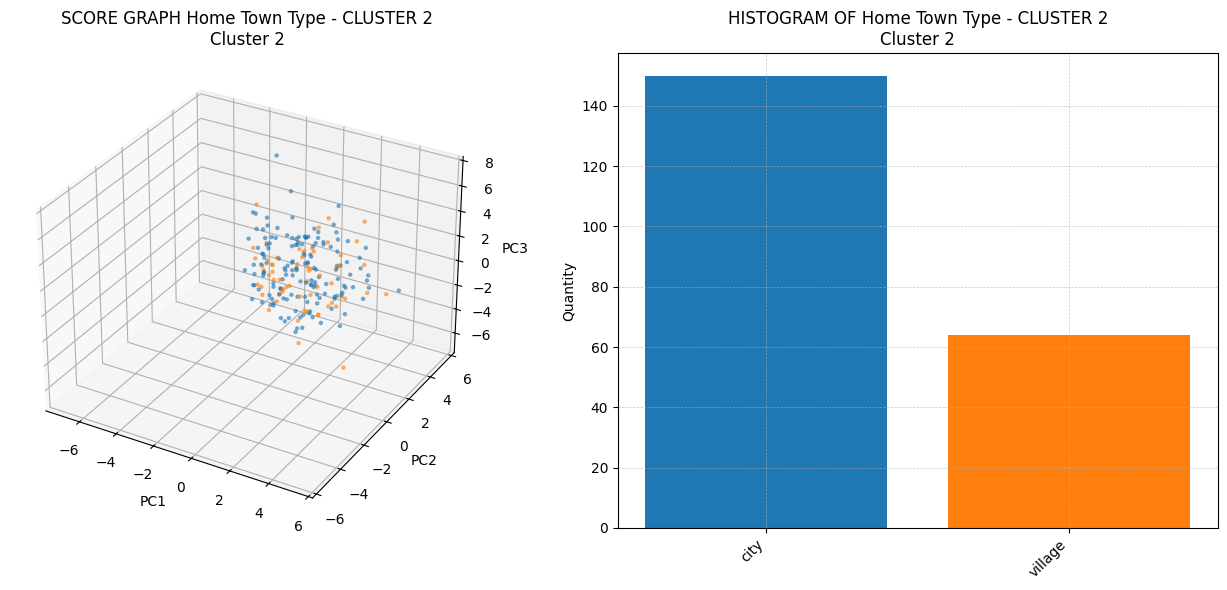

In [58]:
# --- EXERCISE 5: CLUSTER EXTERNAL EVALUATIONS ---

# 1. Variable Definition
centroids_names = [f'Cluster {i}' for i in range(km_final.n_clusters)] 

# Labels to analyze
selected_labels = ['Gender','Age','Education','Home Town Type'] 

# Plot Data (PCA Coordinates)
Y = responses_ft_pca.values 
labels_clustering = km_final.labels_ 

# Axis Names
pc_names = ['PC1', 'PC2', 'PC3']

# 2. Visualization Loop 
for lb in selected_labels:
    # Retrieve unique values and global counts
    lb_values, lb_counts = np.unique(responses[lb].values, return_counts=True)
    
    # Color Management (Distinction between Numerical and Categorical as in PyLab05)
    # If the variable is numerical and has many values (like Age or Overall)
    if lb == 'Age' or len(lb_values) > 10: 
        n_color_hist = int(responses[lb].max() - responses[lb].min() + 1)
        cmap_hist = cm.get_cmap('viridis')
        # Continuous color mapping
        color_hist = cmap_hist(np.linspace(0, 1, n_color_hist))
        color_scat = [color_hist[int(ll - responses[lb].min()), :3] for ll in responses[lb].values]
        # Regenerate complete color_hist for the barplot
        color_hist = cmap_hist(np.linspace(0, 1, len(lb_values))) 
    else: 
        # Categorical Variable (Gender, Education)
        n_color_hist = lb_values.size
        cmap_hist = cm.get_cmap('tab10')
        color_scat_dict = {lb_values[ii]: ii for ii in range(len(lb_values))}
        color_scat = [cmap_hist(color_scat_dict[ll]) for ll in responses[lb].values]
        color_hist = cmap_hist(np.arange(0, n_color_hist))
        
    color_hist = color_hist[:, :3] # Removes alpha channel if excessively present
    
    # --- GLOBAL PLOT ---
    fig_lb = plt.figure(figsize=(13, 6))
    
    # Subplot 1 - Global 3D Scatter
    ax1_lb = fig_lb.add_subplot(1, 2, 1, projection='3d')
    # If you have fewer than 3 PCs, adjust indices (e.g., use only 0 and 1 and remove projection='3d')
    ax1_lb.scatter(Y[:, 0], Y[:, 1], Y[:, 2], s=2, c=color_scat, alpha=0.25)
    ax1_lb.set_title(f"SCORE GRAPH W.R.T. LABEL {lb} (GLOBAL)")
    ax1_lb.set_xlabel(pc_names[0])
    ax1_lb.set_ylabel(pc_names[1])
    ax1_lb.set_zlabel(pc_names[2])
    ax1_lb.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Subplot 2 - Global Histogram
    ax2_lb = fig_lb.add_subplot(1, 2, 2)
    ax2_lb.bar(range(len(lb_values)), lb_counts, color=color_hist) 
    ax2_lb.set_xticks(range(len(lb_values)))
    ax2_lb.set_xticklabels(lb_values, rotation=45, ha='right')
    ax2_lb.set_title(f"HISTOGRAM OF LABEL {lb} (GLOBAL)")
    ax2_lb.set_ylabel("Quantity")
    ax2_lb.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    plt.tight_layout()
    plt.show()

    # --- PLOT PER SINGLE CLUSTER ---
    for cc in range(km_final.n_clusters):
        # Indices of points in cluster cc
        where_cc = np.argwhere(labels_clustering == cc).flatten()
        
        # Counts within the cluster
        cc_values_present, cc_counts_present = np.unique(responses[lb].values[where_cc], return_counts=True)
        
        # Reconstruct the frequency array aligned with the global one (for visual comparison)
        new_counts = np.zeros(len(lb_values), dtype=int)
        for val, count in zip(cc_values_present, cc_counts_present):
            if val in lb_values:
                idx = np.where(lb_values == val)[0][0]
                new_counts[idx] = count
        
        cc_counts = new_counts
        
        fig_cc = plt.figure(figsize=(13,6))      
        
        # Subplot 1: Cluster 3D Scatter
        ax1_cc = fig_cc.add_subplot(1, 2, 1, projection='3d')
        # Specific colors for points in the cluster
        cluster_colors = [color_scat[wc] for wc in where_cc]
        ax1_cc.scatter(Y[where_cc, 0], Y[where_cc, 1], Y[where_cc, 2], s=5, c=cluster_colors, alpha=0.5)
        
        ax1_cc.set_title(f"SCORE GRAPH {lb} - CLUSTER {cc}\n{centroids_names[cc]}")
        ax1_cc.set_xlabel(pc_names[0])
        ax1_cc.set_ylabel(pc_names[1])
        ax1_cc.set_zlabel(pc_names[2])
        # Set limits equal to the global plot for comparison
        ax1_cc.set_xlim(Y[:,0].min(), Y[:,0].max())
        ax1_cc.set_ylim(Y[:,1].min(), Y[:,1].max())
        ax1_cc.set_zlim(Y[:,2].min(), Y[:,2].max())
        ax1_cc.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Subplot 2 - Cluster Histogram
        ax2_cc = fig_cc.add_subplot(1, 2, 2)
        ax2_cc.bar(range(len(lb_values)), cc_counts, color=color_hist)
        ax2_cc.set_xticks(range(len(lb_values)))
        ax2_cc.set_xticklabels(lb_values, rotation=45, ha='right')
        ax2_cc.set_title(f"HISTOGRAM OF {lb} - CLUSTER {cc}\n{centroids_names[cc]}")
        ax2_cc.set_ylabel("Quantity")
        ax2_cc.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        
        plt.tight_layout()  
        plt.show()

In [59]:
labels_to_analyze = ['Gender', 'Age', 'Education', 'Home Town Type']
df_eval = responses[labels_to_analyze].copy()
df_eval['Cluster'] = km_final.labels_

print("============================================================")
print("       EXTERNAL EVALUATION")
print("============================================================\n")

for label in labels_to_analyze:
    # --- SPECIAL HANDLING FOR AGE ---
    if label == 'Age':
        # Transform numbers into categories
        bins = [0, 18, 21, 25, 100]
        group_names = ['Under 18', '19-21', '22-25', 'Over 25']
        # Create a new temporary column for analysis
        df_eval['Age_Group'] = pd.cut(df_eval['Age'], bins=bins, labels=group_names)
        current_label = 'Age_Group'
    else:
        current_label = label

    print(f"******************** LABEL ANALYSIS: {label.upper()} ********************")
    
    # Calculate general totals for the current label
    totals_per_value = df_eval[current_label].value_counts().sort_index()
    
    for i in range(km_final.n_clusters):
        cluster_name = centroids_names[i]
        print(f"\n>>> {cluster_name} (Cluster {i})")
        
        # Filter data for the current cluster
        cluster_data = df_eval[df_eval['Cluster'] == i]
        value_counts_cluster = cluster_data[current_label].value_counts()
        
        for val in totals_per_value.index:
            count = value_counts_cluster.get(val, 0)
            total = totals_per_value[val]
            percentage = (count / total) * 100
            
            print(f"  - {val}: {count} people ({percentage:.1f}% of all '{val}')")

       EXTERNAL EVALUATION

******************** LABEL ANALYSIS: GENDER ********************

>>> Cluster 0 (Cluster 0)
  - female: 85 people (27.1% of all 'female')
  - male: 61 people (31.8% of all 'male')

>>> Cluster 1 (Cluster 1)
  - female: 46 people (14.6% of all 'female')
  - male: 100 people (52.1% of all 'male')

>>> Cluster 2 (Cluster 2)
  - female: 183 people (58.3% of all 'female')
  - male: 31 people (16.1% of all 'male')
******************** LABEL ANALYSIS: AGE ********************

>>> Cluster 0 (Cluster 0)
  - Under 18: 29 people (24.8% of all 'Under 18')
  - 19-21: 81 people (29.3% of all '19-21')
  - 22-25: 27 people (31.8% of all '22-25')
  - Over 25: 9 people (32.1% of all 'Over 25')

>>> Cluster 1 (Cluster 1)
  - Under 18: 42 people (35.9% of all 'Under 18')
  - 19-21: 75 people (27.2% of all '19-21')
  - 22-25: 22 people (25.9% of all '22-25')
  - Over 25: 7 people (25.0% of all 'Over 25')

>>> Cluster 2 (Cluster 2)
  - Under 18: 46 people (39.3% of all 'Under 18

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

The following analysis prioritizes relative distribution over absolute numerical counts.<br>
Given the significant imbalance in the dataset (e.g., more females than males, more city dwellers than villagers), comparing raw numbers would be misleading. Instead, we focus on the percentage of the total class population captured by each cluster. <br>

1. Label: Gender <br> 
Confirming our initial hypothesis, gender is the strongest discriminator. The algorithm reveals a clear behavioral split: Cluster 1 ("Pragmatic/Detached") is male-dominated, capturing 52.1% of the total male population. Conversely, Cluster 2 ("Esthetic/Emotional") is female-oriented, containing 58.3% of the female dataset. Cluster 0 ("Science/Rationality") remains balanced, effectively debunking the stereotype that intellectual interests are a male prerogative. Ultimately, women appear polarized between "worldly" (Cluster 2) and "intellectual" (Cluster 0) spheres, whereas the majority of men concentrate around emotional neutrality or apathy (Cluster 1).

2. Label: Age<br>
Contradicting the hypothesis that profiles are life-stage dependent, age acts as a neutral factor, showing no significant discrimination power. The distribution is surprisingly uniform: Cluster 2 consistently captures about 40-43% of every age bracket, while Cluster 0 and Cluster 1 take smaller, balanced shares across generations. Interpretation: This uniformity suggests that the identified personality traits are generational-agnostic. The "Intellectual" mindset (Cluster 0) or the "Emotional" tendency (Cluster 2) are not phases of life or maturity levels; they are intrinsic personality types found equally in teenagers (Under 18) and adults (Over 25).

3. Label: Education<br>
Contrary to the expectation that intellectual engagement aligns linearly with schooling, the relationship is weak and non-linear, acting more as noise than a driver. While Cluster 1 ("Detached") captures nearly half (47.6%) of those with only primary education, possibly linking lower engagement to lower education, Cluster 2 presents a paradox. It groups disparate extremes, capturing 100% of current primary pupils alongside 66.7% of Doctorate holders. Interpretation: This contradiction confirms that formal education does not define the clusters. Cultural interests and consumption habits (e.g., movies, music) override academic credentials, grouping PhDs and school children together based on shared emotional or aesthetic preferences.

4. Label: Home Town Type<br>
Refuting the hypothesis that "Esthetic" interests are urban-driven, geography offers no explanatory power for this segmentation. The results show a perfect symmetry: Cluster 0 and Cluster 1 capture approximately 27-29% of both city and village residents. Similarly, Cluster 2 captures approximately 41-45% of both groups. <br> 
Since the capture rates are balanced for both categories across all clusters, the urban/rural split is statistically irrelevant. Whether a user lives in a metropolis or a village does not influence their likelihood of being a "Scientist" (Cluster 0), "Detached" (Cluster 1), or "Esthete" (Cluster 2). These behavioral patterns transcend environmental factors.

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Sil. Score
Cluster 0    0.159344
Cluster 1    0.160384
Cluster 2    0.187442
Global       0.171528

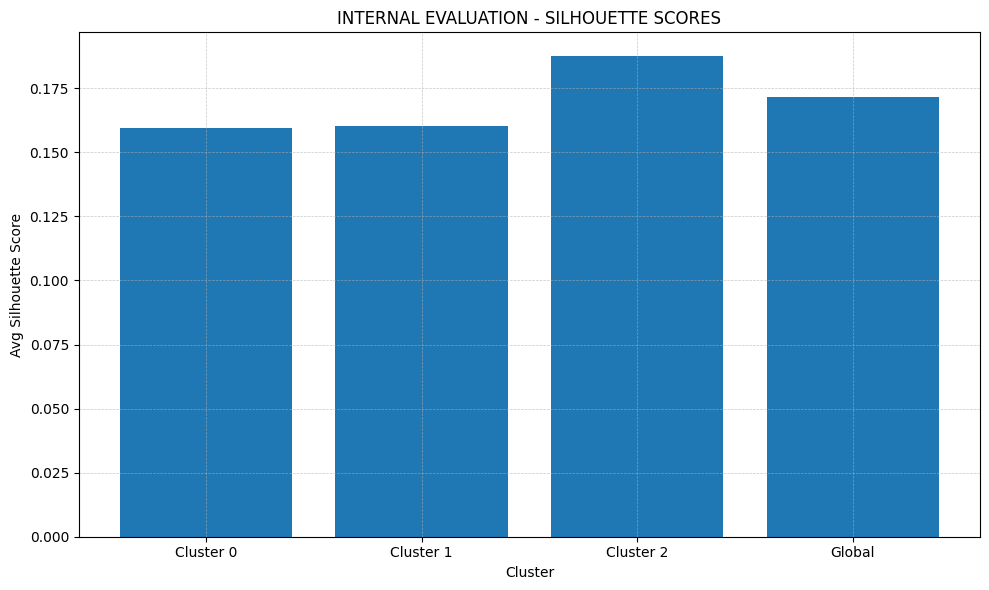

In [60]:
# 1. Silhouette Calculation
# Calculate silhouette for each person
# Y -> values of the final PCA dataframe. (The PCA dataframe acts like a map with 5 coordinates for each person, 
# providing the point coordinates along the 5 components—their precise spatial position—which is needed to calculate distances between points).
# labels_clustering -> vector where each record indicates the cluster to which the person belongs (0, 1, 2).

silscores = silhouette_samples(Y, labels_clustering)

# Returns an array of values, one for each person.

# Calculate mean silhouette for each cluster
cluster_silscores = [np.mean(silscores[labels_clustering == kk]) for kk in range(km_final.n_clusters)]
# So it will contain only 3 values with k=3

# Calculate global silhouette
silcoeff_global = silhouette_score(Y, labels_clustering)
# While silhouette_samples gives the "score" for each single person (each row), 
# silhouette_score provides the average of all of them, resulting in a single value.

# 2. Creation of Tabular DataFrame
# Adds the Global score to the list
silcoeff_df = pd.DataFrame(np.array(cluster_silscores + [silcoeff_global]), 
                           index=centroids_names + ['Global'], 
                           columns=['Sil. Score'])

display(silcoeff_df)

plt.figure(figsize=(10, 6))
plt.bar(silcoeff_df.index.tolist(), silcoeff_df['Sil. Score'].values)
plt.xlabel('Cluster')
plt.ylabel('Avg Silhouette Score')
plt.title('INTERNAL EVALUATION - SILHOUETTE SCORES')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):
The global silhouette score (~0.17) is positive but relatively low. This is typical for high-dimensional psychometric data where personality traits are fluid rather than forming distinct, separated blobs. However, the scores are remarkably balanced across all clusters (ranging from 0.16 to 0.18), indicating a stable structure where no single group is ill-defined.

Cluster 2 achieves the highest score (0.187). This confirms the External Evaluation results, where this cluster showed the sharpest demographic characterization (strongly female-dominated). Its definition via specific concrete habits (shopping) and phobias creates a tighter core. Conversely, Clusters 0 and 1, defined by broader traits like "Rationality" or "Apathy," are slightly more dispersed, reflecting a more heterogeneous membership compared to the distinct profile of Cluster 2.